In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
#import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

# fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/WMT/'
# npy_path = '/users/boeiradi/COLD_project/postprocessing/tmp_files/'

fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/WMT/'
npy_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/tmp_files/'


In [2]:
# read surface fluxes 
WAOM10_shelf_heat_sfc = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_sfc_heat.npz')
WAOM10_shelf_salt_sfc = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_sfc_salt.npz')

WAOM4_shelf_heat_sfc = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_sfc_heat.npz')
WAOM4_shelf_salt_sfc = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_sfc_salt.npz')

WAOM2_shelf_heat_sfc = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_sfc_heat.npz')
WAOM2_shelf_salt_sfc = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_sfc_salt.npz')


In [3]:
# 4km yr20
WAOM4_yr20_shelf_heat_sfc = np.load(npy_path + 'WAOM4extend_yr20_Full_WMT_shelf_sfc_heat.npz')
WAOM4_yr20_shelf_salt_sfc = np.load(npy_path + 'WAOM4extend_yr20_Full_WMT_shelf_sfc_salt.npz')

WAOM4_yr20_shelf_heat_net = np.load(npy_path + 'WAOM4extend_yr20_Full_WMT_shelf_vint_heat_net.npz')
WAOM4_yr20_shelf_salt_net = np.load(npy_path + 'WAOM4extend_yr20_Full_WMT_shelf_vint_salt_net.npz')

WAOM4_yr20_shelf_heat_adv = np.load(npy_path + 'WAOM4extend_yr20_Full_WMT_shelf_vint_heat_adv.npz')
WAOM4_yr20_shelf_salt_adv = np.load(npy_path + 'WAOM4extend_yr20_Full_WMT_shelf_vint_salt_adv.npz')

WAOM4_yr20_shelf_heat_diff = np.load(npy_path + 'WAOM4extend_yr20_Full_WMT_shelf_vint_heat_diff.npz')
WAOM4_yr20_shelf_salt_diff = np.load(npy_path + 'WAOM4extend_yr20_Full_WMT_shelf_vint_salt_diff.npz')



In [4]:
# 4km yr20
WAOM2_yr1_shelf_heat_sfc = np.load(npy_path + 'WAOM2extend_yr1_Full_WMT_shelf_sfc_heat.npz')
WAOM2_yr1_shelf_salt_sfc = np.load(npy_path + 'WAOM2extend_yr1_Full_WMT_shelf_sfc_salt.npz')

WAOM2_yr1_shelf_heat_net = np.load(npy_path + 'WAOM2extend_yr1_Full_WMT_shelf_vint_heat_net.npz')
WAOM2_yr1_shelf_salt_net = np.load(npy_path + 'WAOM2extend_yr1_Full_WMT_shelf_vint_salt_net.npz')

WAOM2_yr1_shelf_heat_adv = np.load(npy_path + 'WAOM2extend_yr1_Full_WMT_shelf_vint_heat_adv.npz')
WAOM2_yr1_shelf_salt_adv = np.load(npy_path + 'WAOM2extend_yr1_Full_WMT_shelf_vint_salt_adv.npz')

WAOM2_yr1_shelf_heat_diff = np.load(npy_path + 'WAOM2extend_yr1_Full_WMT_shelf_vint_heat_diff.npz')
WAOM2_yr1_shelf_salt_diff = np.load(npy_path + 'WAOM2extend_yr1_Full_WMT_shelf_vint_salt_diff.npz')



In [5]:
# read net tendencies, adv, diff
WAOM10_shelf_heat_net = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_vint_heat_net.npz')
WAOM10_shelf_salt_net = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_vint_salt_net.npz')

WAOM4_shelf_heat_net = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_vint_heat_net.npz')
WAOM4_shelf_salt_net = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_vint_salt_net.npz')

WAOM2_shelf_heat_net = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_vint_heat_net.npz')
WAOM2_shelf_salt_net = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_vint_salt_net.npz')


In [6]:
WAOM10_shelf_heat_adv = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_vint_heat_adv.npz')
WAOM10_shelf_salt_adv = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_vint_salt_adv.npz')

WAOM4_shelf_heat_adv = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_vint_heat_adv.npz')
WAOM4_shelf_salt_adv = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_vint_salt_adv.npz')

WAOM2_shelf_heat_adv = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_vint_heat_adv.npz')
WAOM2_shelf_salt_adv = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_vint_salt_adv.npz')

In [7]:
WAOM10_shelf_heat_diff = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_vint_heat_diff.npz')
WAOM10_shelf_salt_diff = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_vint_salt_diff.npz')

WAOM4_shelf_heat_diff = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_vint_heat_diff.npz')
WAOM4_shelf_salt_diff = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_vint_salt_diff.npz')

WAOM2_shelf_heat_diff = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_vint_heat_diff.npz')
WAOM2_shelf_salt_diff = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_vint_salt_diff.npz')

In [8]:
print(WAOM10_shelf_heat_net.files, WAOM10_shelf_salt_diff.files, WAOM10_shelf_salt_sfc.files, WAOM10_shelf_heat_sfc.files)

['rho_grid', 'Fh_sig_net_vint_shelf'] ['rho_grid', 'Fs_sig_diff_vint_shelf', 'Fs_sig_vdiff_vint_shelf', 'Fs_sig_hdiff_vint_shelf'] ['rho_grid', 'Fs_sig_sfc_shelf'] ['rho_grid', 'Fh_sig_sfc_shelf']


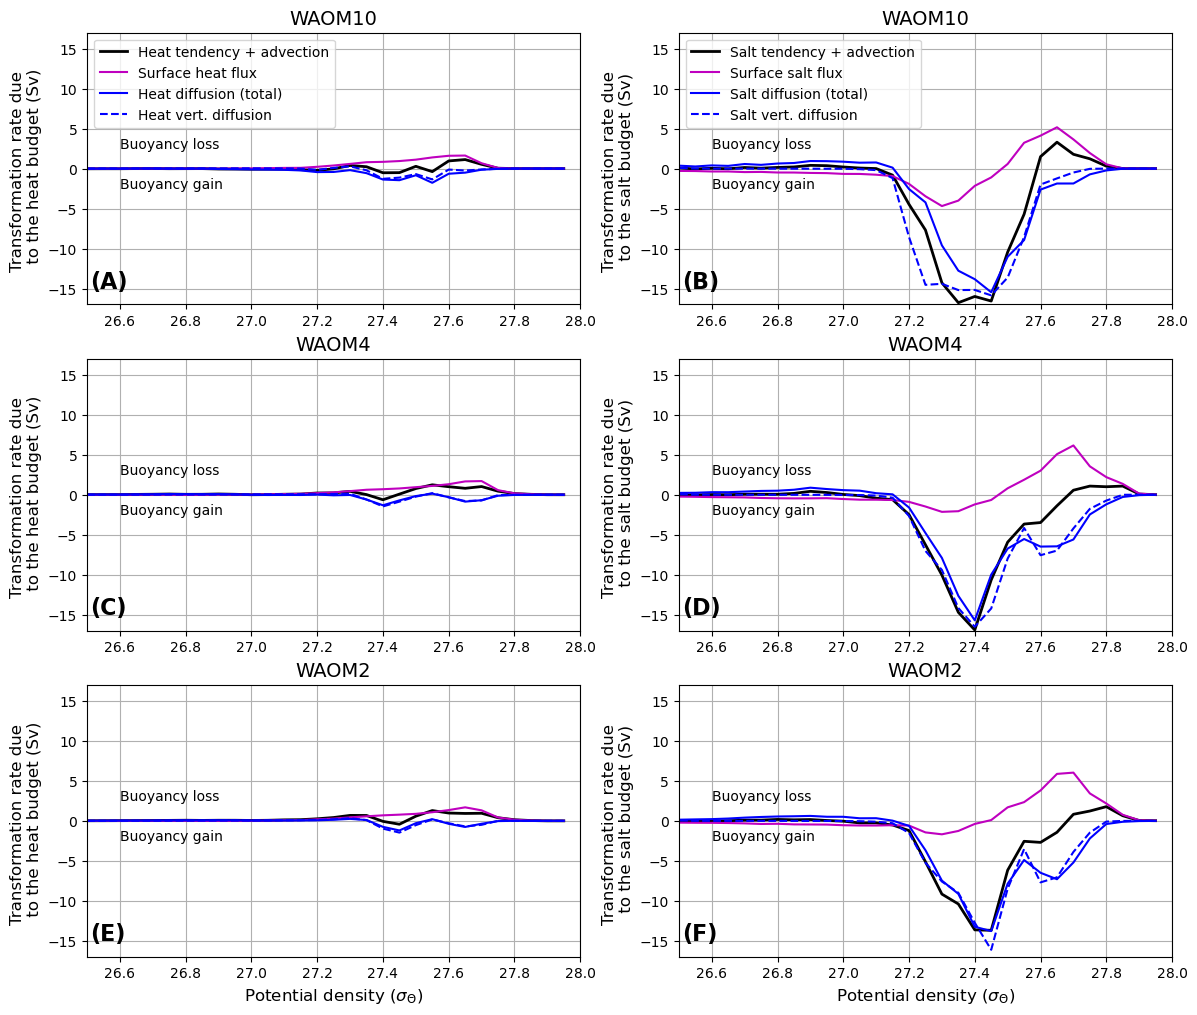

In [9]:
## NEW PERSPECTIVE BASED ON REVIEWER 2 COMMENT ABOUT ADVECTION:

# WMT framework should filter out adiabatic advective redistribution of water 
#   1. vert diffusion term is the diffusive fluxes at the base of the ML. The epineutral diffusion 
# (likely horizontal in the ML) should have an important impact of the diagnosed WMT. (include more in the paper) 
#
#   2. Advection is not an WMT factor on regional scale, but rather the balancing term of sfc flx + mixing WMT.
# If the advection doesn't balance (which means the net tendency is non-zero), this is because of the model drift and/or
# numerical diffusion. It appears the model drift is dominant, so no reliable link b/w WMT and circulation can be made.
#
#   3. reviewer thinks the WMT should be full depth integrated. MLD intergrated makes it difficult to interpret, because 
# the diagnosed WMT can be balanced by vert flow at the base of ML and horiz flow in the northern boundary of the domain. 
# I should diagnosed full-depth integrated to an interpretable estimate of WMT over Antarctic shelf and cavities.
# (because there's not vert flow at the base of the MLD, and all the diagnosed WMT would be due to horz flow at the
# northern boundary)


rho_grid = WAOM10_shelf_heat_net['rho_grid']

# fig = plt.figure(figsize=(18,9))
fig = plt.figure(figsize=(14,12))
# BUDGET

ax1 = fig.add_subplot(321)
plt.title('WAOM10',fontsize=14)
cn=plt.plot(rho_grid,WAOM10_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM10_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,WAOM10_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
cd=plt.plot(rho_grid,WAOM10_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM10_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion (total)')
cd=plt.plot(rho_grid,WAOM10_shelf_heat_diff['Fh_sig_vdiff_vint_shelf']-WAOM10_shelf_heat_sfc['Fh_sig_sfc_shelf'],'--b',label='Heat vert. diffusion')
# cd=plt.plot(rho_grid,WAOM10_shelf_heat_diff['Fh_sig_diff_vint_shelf'],'--r',label='Heat diffusion + total')
# cr=plt.plot(rho_grid,WAOM10_shelf_heat_adv['Fh_sig_adv_vint_shelf']+WAOM10_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM10_shelf_heat_net['Fh_sig_net_vint_shelf'],'-y',label='residue')
plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
plt.legend(loc='upper left')
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-17,17)
plt.grid(True)
plt.text(26.51,-15,'(A)',fontsize=16,weight="bold")
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax2 = fig.add_subplot(323)
plt.title('WAOM4',fontsize=14)
cn=plt.plot(rho_grid,WAOM4_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM4_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,WAOM4_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
cd=plt.plot(rho_grid,WAOM4_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM4_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion (total)')
cd=plt.plot(rho_grid,WAOM4_shelf_heat_diff['Fh_sig_vdiff_vint_shelf']-WAOM4_shelf_heat_sfc['Fh_sig_sfc_shelf'],'--b',label='Heat vert. diffusion')
# cd=plt.plot(rho_grid,WAOM4_shelf_heat_diff['Fh_sig_diff_vint_shelf'],'--r',label='Heat diffusion + total')
plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-17,17)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
plt.text(26.51,-15,'(C)',fontsize=16,weight="bold")

#
ax3 = fig.add_subplot(325)
plt.title('WAOM2',fontsize=14)
cn=plt.plot(rho_grid,WAOM2_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM2_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,WAOM2_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
cd=plt.plot(rho_grid,WAOM2_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM2_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion (total)')
cd=plt.plot(rho_grid,WAOM2_shelf_heat_diff['Fh_sig_vdiff_vint_shelf']-WAOM2_shelf_heat_sfc['Fh_sig_sfc_shelf'],'--b',label='Heat vert. diffusion')
# cd=plt.plot(rho_grid,WAOM2_shelf_heat_diff['Fh_sig_diff_vint_shelf'],'--r',label='Heat diffusion + total')
plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-17,17)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
plt.text(26.51,-15,'(E)',fontsize=16,weight="bold")

ax4 = fig.add_subplot(322)
plt.title('WAOM10',fontsize=14)
cn=plt.plot(rho_grid,-WAOM10_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM10_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM10_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM10_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion (total)')
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_vdiff_vint_shelf']+WAOM10_shelf_salt_sfc['Fs_sig_sfc_shelf'],'--b',label='Salt vert. diffusion')
# cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_diff_vint_shelf'],'--r',label='Salt diffusion total')
plt.legend(loc='upper left')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-17,17)
plt.grid(True)
plt.text(26.51,-15,'(B)',fontsize=16,weight="bold")

plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax5 = fig.add_subplot(324)
plt.title('WAOM4',fontsize=14)
cn=plt.plot(rho_grid,-WAOM4_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM4_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion (total)')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_vdiff_vint_shelf']+WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'--b',label='Salt vert. diffusion')
# cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_diff_vint_shelf'],'--r',label='Salt diffusion total')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-17,17)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
plt.text(26.51,-15,'(D)',fontsize=16,weight="bold")
#
ax6 = fig.add_subplot(326)
plt.title('WAOM2',fontsize=14)
cn=plt.plot(rho_grid,-WAOM2_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM2_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion (total)')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_vdiff_vint_shelf']+WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'--b',label='Salt vert. diffusion')
# cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_diff_vint_shelf'],'--r',label='Salt diffusion total')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-17,17)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
plt.text(26.51,-15,'(F)',fontsize=16,weight="bold")



name_fig="waom10x4x2extend_shflim_S_0.25Q_WMT_Full_vint_yr20_shelf_heat+salt-budget_reviewing.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()


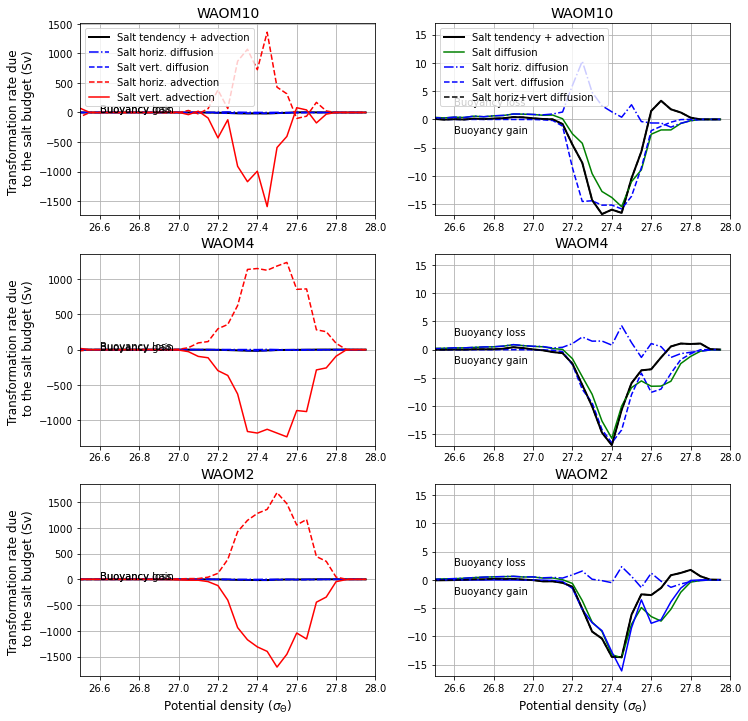

In [8]:
# splitting diff and adv into horiz/vert components

# summary of findings:
# 1. advection: huge values (~1500 Sv); horiz induces buoy loss and vert induces buoy gain = mostly cancel each other

# 2. horiz diffusion and horizontal advection have EXACTLY the same diapycnal volume flux (WMT)!!!
#     ERROR WHEN CALCULATING HORIZ DIFFUSION TERM - USED HORIZ ADVECTION INSTEAD, FIXING IT NOW (7/10/22)

# 3. if summing up horiz and vert diffusion, the result is quite different (much larger) than the diffusion term,
#    pretty much dominated by horz diffusion. The diffusion term is close to the vertical diffusion in density-space.

rho_grid = WAOM10_shelf_heat_net['rho_grid']

# fig = plt.figure(figsize=(18,9))
fig = plt.figure(figsize=(18,12))
# BUDGET

# plotting advection horiz/vert components
ax7 = fig.add_subplot(331)
plt.title('WAOM10',fontsize=14)
cn=plt.plot(rho_grid,-WAOM10_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM10_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_hdiff_vint_shelf'],'-.b',label='Salt horiz. diffusion')
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_vdiff_vint_shelf']+WAOM10_shelf_salt_sfc['Fs_sig_sfc_shelf'],'--b',label='Salt vert. diffusion')
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_adv['Fs_sig_hadv_vint_shelf'],'--r',label='Salt horiz. advection')
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_adv['Fs_sig_vadv_vint_shelf'],'-r',label='Salt vert. advection')
plt.legend(loc='upper left')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28)#,plt.ylim(-100,100)
plt.grid(True)
# plt.text(26.51,-17,'(B)',fontsize=16,weight="bold")

plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax5 = fig.add_subplot(334)
plt.title('WAOM4',fontsize=14)
cn=plt.plot(rho_grid,-WAOM4_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM4_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_hdiff_vint_shelf'],'-.b',label='Salt horiz. diffusion')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_vdiff_vint_shelf']+WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'--b',label='Salt vert. diffusion')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_adv['Fs_sig_hadv_vint_shelf'],'--r',label='Salt horiz. advection')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_adv['Fs_sig_vadv_vint_shelf'],'-r',label='Salt vert. advection')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlim(26.5,28)#,plt.ylim(-100,100)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
# plt.text(26.51,-17,'(D)',fontsize=16,weight="bold")
#
ax6 = fig.add_subplot(337)
plt.title('WAOM2',fontsize=14)
cn=plt.plot(rho_grid,-WAOM2_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM2_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_hdiff_vint_shelf'],'-.b',label='Salt horiz. diffusion')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_vdiff_vint_shelf']+WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'--b',label='Salt vert. diffusion')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_adv['Fs_sig_hadv_vint_shelf'],'--r',label='Salt horiz. advection')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_adv['Fs_sig_vadv_vint_shelf'],'-r',label='Salt vert. advection')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28)#,plt.ylim(-100,100)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
# plt.text(26.51,-17,'(F)',fontsize=16,weight="bold")

# splitting diff into horiz/vert components
ax7 = fig.add_subplot(332)
plt.title('WAOM10',fontsize=14)
cn=plt.plot(rho_grid,-WAOM10_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM10_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM10_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-g',label='Salt diffusion')
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_hdiff_vint_shelf'],'-.b',label='Salt horiz. diffusion')
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_vdiff_vint_shelf']+WAOM10_shelf_salt_sfc['Fs_sig_sfc_shelf'],'--b',label='Salt vert. diffusion')
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_hdiff_vint_shelf']-WAOM10_shelf_salt_diff['Fs_sig_vdiff_vint_shelf'],'--k',label='Salt horiz+vert diffusion')
plt.legend(loc='upper left')
# plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-17,17)
plt.grid(True)
# plt.text(26.51,-17,'(B)',fontsize=16,weight="bold")

plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax5 = fig.add_subplot(335)
plt.title('WAOM4',fontsize=14)
cn=plt.plot(rho_grid,-WAOM4_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM4_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-g',label='Salt diffusion')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_hdiff_vint_shelf'],'-.b',label='Salt horiz. diffusion')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_vdiff_vint_shelf']+WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'--b',label='Salt vert. diffusion')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_hdiff_vint_shelf']-WAOM4_shelf_salt_diff['Fs_sig_vdiff_vint_shelf'],'--k',label='Salt horiz+vert diffusion')
# plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-17,17)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
# plt.text(26.51,-17,'(D)',fontsize=16,weight="bold")
#
ax6 = fig.add_subplot(338)
plt.title('WAOM2',fontsize=14)
cn=plt.plot(rho_grid,-WAOM2_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM2_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-g',label='Salt diffusion')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_hdiff_vint_shelf'],'-.b',label='Salt horiz. diffusion')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_vdiff_vint_shelf']+WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt vert. diffusion')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_hdiff_vint_shelf']-WAOM2_shelf_salt_diff['Fs_sig_vdiff_vint_shelf'],'--k',label='Salt horiz+vert diffusion')
# plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-17,17)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
# plt.text(26.51,-17,'(F)',fontsize=16,weight="bold")


name_fig="waom10x4x2extend_shflim_S_0.25Q_WMT_Full_vint_yr20_shelf_salt-budget_horz_vert.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()


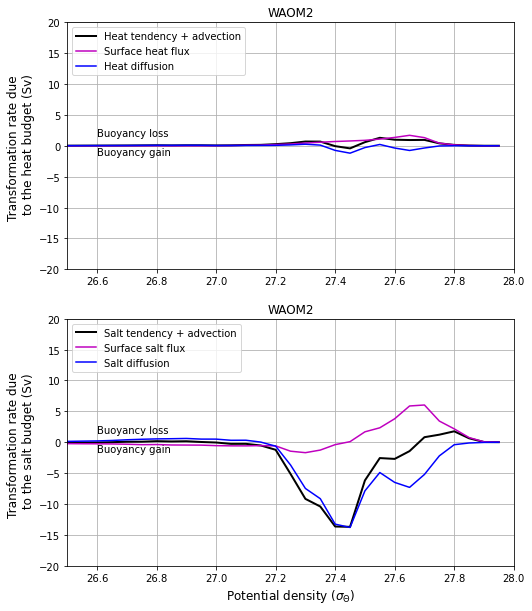

In [9]:
rho_grid = WAOM10_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(8,10))

# BUDGET

ax1 = fig.add_subplot(211)
plt.title('WAOM2',fontsize=12)
cn=plt.plot(rho_grid,WAOM2_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM2_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,WAOM2_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
# ca=plt.plot(rho_grid,WAOM2_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'-r',label='Heat advection')
cd=plt.plot(rho_grid,WAOM2_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM2_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion')
plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
plt.legend(loc='upper left')
plt.xlim(26.5,28),plt.ylim(-20,20)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')

ax2 = fig.add_subplot(212)
plt.title('WAOM2',fontsize=12)
cn=plt.plot(rho_grid,-WAOM2_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM2_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
# ca=plt.plot(rho_grid,-WAOM2_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper left')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-20,20)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')



name_fig="waom2extend_shflim_S_0.25Q_WMT_Full_vint_yr20_shelf_heat+salt-budget.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

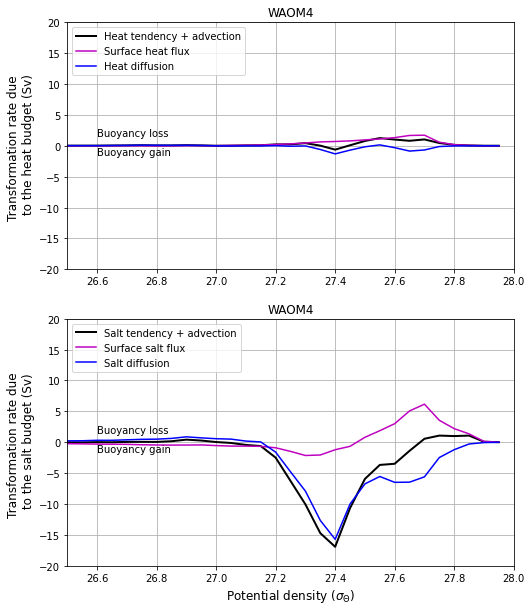

In [10]:
rho_grid = WAOM10_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(8,10))

# BUDGET

ax1 = fig.add_subplot(211)
plt.title('WAOM4',fontsize=12)
cn=plt.plot(rho_grid,WAOM4_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM4_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,WAOM4_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
# ca=plt.plot(rho_grid,WAOM4_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'-r',label='Heat advection')
cd=plt.plot(rho_grid,WAOM4_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM4_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion')
plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
plt.legend(loc='upper left')
plt.xlim(26.5,28),plt.ylim(-20,20)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')

ax2 = fig.add_subplot(212)
plt.title('WAOM4',fontsize=12)
cn=plt.plot(rho_grid,-WAOM4_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM4_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
# ca=plt.plot(rho_grid,-WAOM4_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper left')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-20,20)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')



name_fig="waom4extend_shflim_S_0.25Q_WMT_Full_vint_yr20_shelf_heat+salt-budget.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

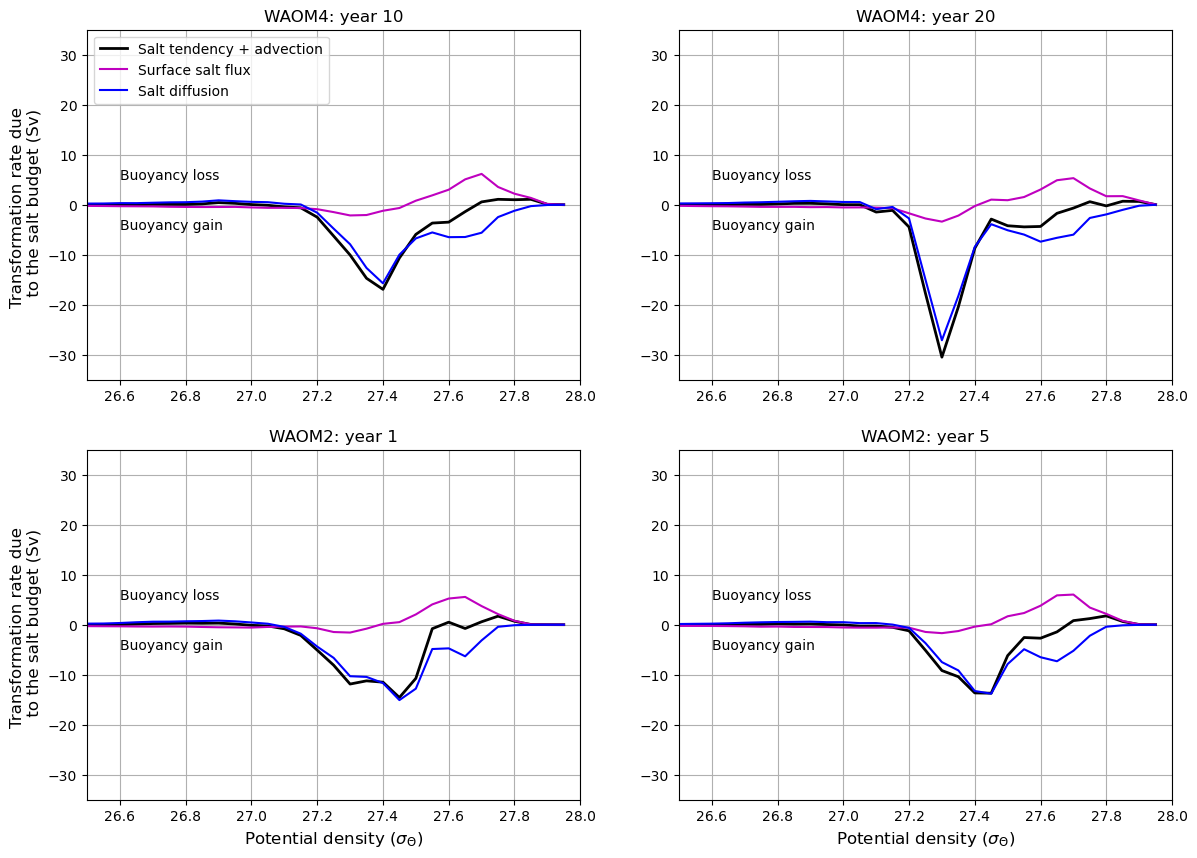

In [13]:
rho_grid = WAOM10_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(14,10))

# BUDGET

# ax1 = fig.add_subplot(221)
# plt.title('WAOM4: year 10',fontsize=12)
# cn=plt.plot(rho_grid,WAOM4_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM4_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency + advection',linewidth=2)
# cs=plt.plot(rho_grid,WAOM4_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
# cd=plt.plot(rho_grid,WAOM4_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM4_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion')
# plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
# plt.legend(loc='upper left')
# plt.xlim(26.5,28),plt.ylim(-10,10)
# plt.grid(True)
# plt.text(26.6,1.5,'Buoyancy loss')
# plt.text(26.6,-1.5,'Buoyancy gain')

ax1 = fig.add_subplot(221)
plt.title('WAOM4: year 10',fontsize=12)
cn=plt.plot(rho_grid,-WAOM4_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM4_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper left')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-35,35)
plt.grid(True)
plt.text(26.6,5.,'Buoyancy loss')
plt.text(26.6,-5.,'Buoyancy gain')

ax2 = fig.add_subplot(222)
plt.title('WAOM4: year 20',fontsize=12)
cn=plt.plot(rho_grid,-WAOM4_yr20_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM4_yr20_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_yr20_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
cd=plt.plot(rho_grid,-WAOM4_yr20_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM4_yr20_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-35,35)
plt.grid(True)
plt.text(26.6,5.,'Buoyancy loss')
plt.text(26.6,-5.,'Buoyancy gain')

ax3 = fig.add_subplot(223)
plt.title('WAOM2: year 1',fontsize=12)
cn=plt.plot(rho_grid,-WAOM2_yr1_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM2_yr1_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM2_yr1_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
cd=plt.plot(rho_grid,-WAOM2_yr1_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM2_yr1_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-35,35)
plt.grid(True)
plt.text(26.6,5.,'Buoyancy loss')
plt.text(26.6,-5.,'Buoyancy gain')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)

ax4 = fig.add_subplot(224)
plt.title('WAOM2: year 5',fontsize=12)
cn=plt.plot(rho_grid,-WAOM2_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM2_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
cd=plt.plot(rho_grid,-WAOM2_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM2_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-35,35)
plt.grid(True)
plt.text(26.6,5.,'Buoyancy loss')
plt.text(26.6,-5.,'Buoyancy gain')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)

name_fig="waom4x2extend_shflim_S_0.25Q_WMT_Full_vint_yrs_comparsion_shelf_salt-budget.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

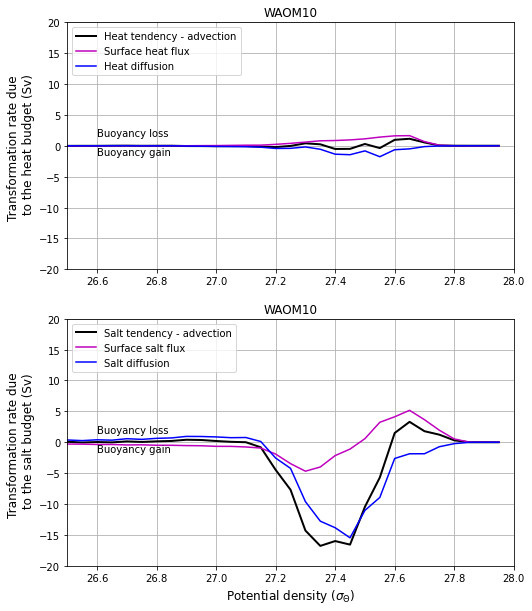

In [11]:
rho_grid = WAOM10_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(8,10))

# BUDGET

ax1 = fig.add_subplot(211)
plt.title('WAOM10',fontsize=12)
cn=plt.plot(rho_grid,WAOM10_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM10_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency - advection',linewidth=2)
cs=plt.plot(rho_grid,WAOM10_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
# ca=plt.plot(rho_grid,WAOM10_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'-r',label='Heat advection')
cd=plt.plot(rho_grid,WAOM10_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM10_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion')
plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
plt.legend(loc='upper left')
plt.xlim(26.5,28),plt.ylim(-20,20)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')

ax2 = fig.add_subplot(212)
plt.title('WAOM10',fontsize=12)
cn=plt.plot(rho_grid,-WAOM10_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM10_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency - advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM10_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
# ca=plt.plot(rho_grid,-WAOM10_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM10_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper left')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-20,20)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')



name_fig="waom10extend_shflim_S_0.25Q_WMT_Full_vint_yr20_shelf_heat+salt-budget.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

In [10]:
## sensitive expts: whole shelf

WAOM4_notides_shelf_heat_sfc = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_sfc_heat.npz')
WAOM4_notides_shelf_salt_sfc = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_sfc_salt.npz')

WAOM4_notides_shelf_heat_net = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_vint_heat_net.npz')
WAOM4_notides_shelf_salt_net = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_vint_salt_net.npz')

WAOM4_notides_shelf_heat_adv = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_vint_heat_adv.npz')
WAOM4_notides_shelf_salt_adv = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_vint_salt_adv.npz')

WAOM4_notides_shelf_heat_diff = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_vint_heat_diff.npz')
WAOM4_notides_shelf_salt_diff = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_vint_salt_diff.npz')

WAOM4_10km_bathy_shelf_heat_sfc = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_sfc_heat.npz')
WAOM4_10km_bathy_shelf_salt_sfc = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_sfc_salt.npz')

WAOM4_10km_bathy_shelf_heat_net = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_vint_heat_net.npz')
WAOM4_10km_bathy_shelf_salt_net = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_vint_salt_net.npz')

WAOM4_10km_bathy_shelf_heat_adv = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_vint_heat_adv.npz')
WAOM4_10km_bathy_shelf_salt_adv = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_vint_salt_adv.npz')

WAOM4_10km_bathy_shelf_heat_diff = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_vint_heat_diff.npz')
WAOM4_10km_bathy_shelf_salt_diff = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_vint_salt_diff.npz')


In [11]:
## sensitive expts: only cont. shelf

WAOM4_notides_shelf_noice_heat_sfc = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_sfc_heat.npz')
WAOM4_notides_shelf_noice_salt_sfc = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_sfc_salt.npz')

WAOM4_notides_shelf_noice_heat_net = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_vint_heat_net.npz')
WAOM4_notides_shelf_noice_salt_net = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_vint_salt_net.npz')

WAOM4_notides_shelf_noice_heat_adv = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_vint_heat_adv.npz')
WAOM4_notides_shelf_noice_salt_adv = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_vint_salt_adv.npz')

WAOM4_notides_shelf_noice_heat_diff = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_vint_heat_diff.npz')
WAOM4_notides_shelf_noice_salt_diff = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_vint_salt_diff.npz')

WAOM4_10km_bathy_shelf_noice_heat_sfc = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_sfc_heat.npz')
WAOM4_10km_bathy_shelf_noice_salt_sfc = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_sfc_salt.npz')

WAOM4_10km_bathy_shelf_noice_heat_net = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_vint_heat_net.npz')
WAOM4_10km_bathy_shelf_noice_salt_net = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_vint_salt_net.npz')

WAOM4_10km_bathy_shelf_noice_heat_adv = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_vint_heat_adv.npz')
WAOM4_10km_bathy_shelf_noice_salt_adv = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_vint_salt_adv.npz')

WAOM4_10km_bathy_shelf_noice_heat_diff = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_vint_heat_diff.npz')
WAOM4_10km_bathy_shelf_noice_salt_diff = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_vint_salt_diff.npz')


In [12]:
## sensitive expts: only iceshelf

WAOM4_notides_iceshelf_heat_sfc = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_sfc_heat.npz')
WAOM4_notides_iceshelf_salt_sfc = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_sfc_salt.npz')

WAOM4_notides_iceshelf_heat_net = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_vint_heat_net.npz')
WAOM4_notides_iceshelf_salt_net = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_vint_salt_net.npz')

WAOM4_notides_iceshelf_heat_adv = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_vint_heat_adv.npz')
WAOM4_notides_iceshelf_salt_adv = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_vint_salt_adv.npz')

WAOM4_notides_iceshelf_heat_diff = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_vint_heat_diff.npz')
WAOM4_notides_iceshelf_salt_diff = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_vint_salt_diff.npz')

WAOM4_10km_bathy_iceshelf_heat_sfc = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_sfc_heat.npz')
WAOM4_10km_bathy_iceshelf_salt_sfc = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_sfc_salt.npz')

WAOM4_10km_bathy_iceshelf_heat_net = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_vint_heat_net.npz')
WAOM4_10km_bathy_iceshelf_salt_net = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_vint_salt_net.npz')

WAOM4_10km_bathy_iceshelf_heat_adv = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_vint_heat_adv.npz')
WAOM4_10km_bathy_iceshelf_salt_adv = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_vint_salt_adv.npz')

WAOM4_10km_bathy_iceshelf_heat_diff = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_vint_heat_diff.npz')
WAOM4_10km_bathy_iceshelf_salt_diff = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_vint_salt_diff.npz')


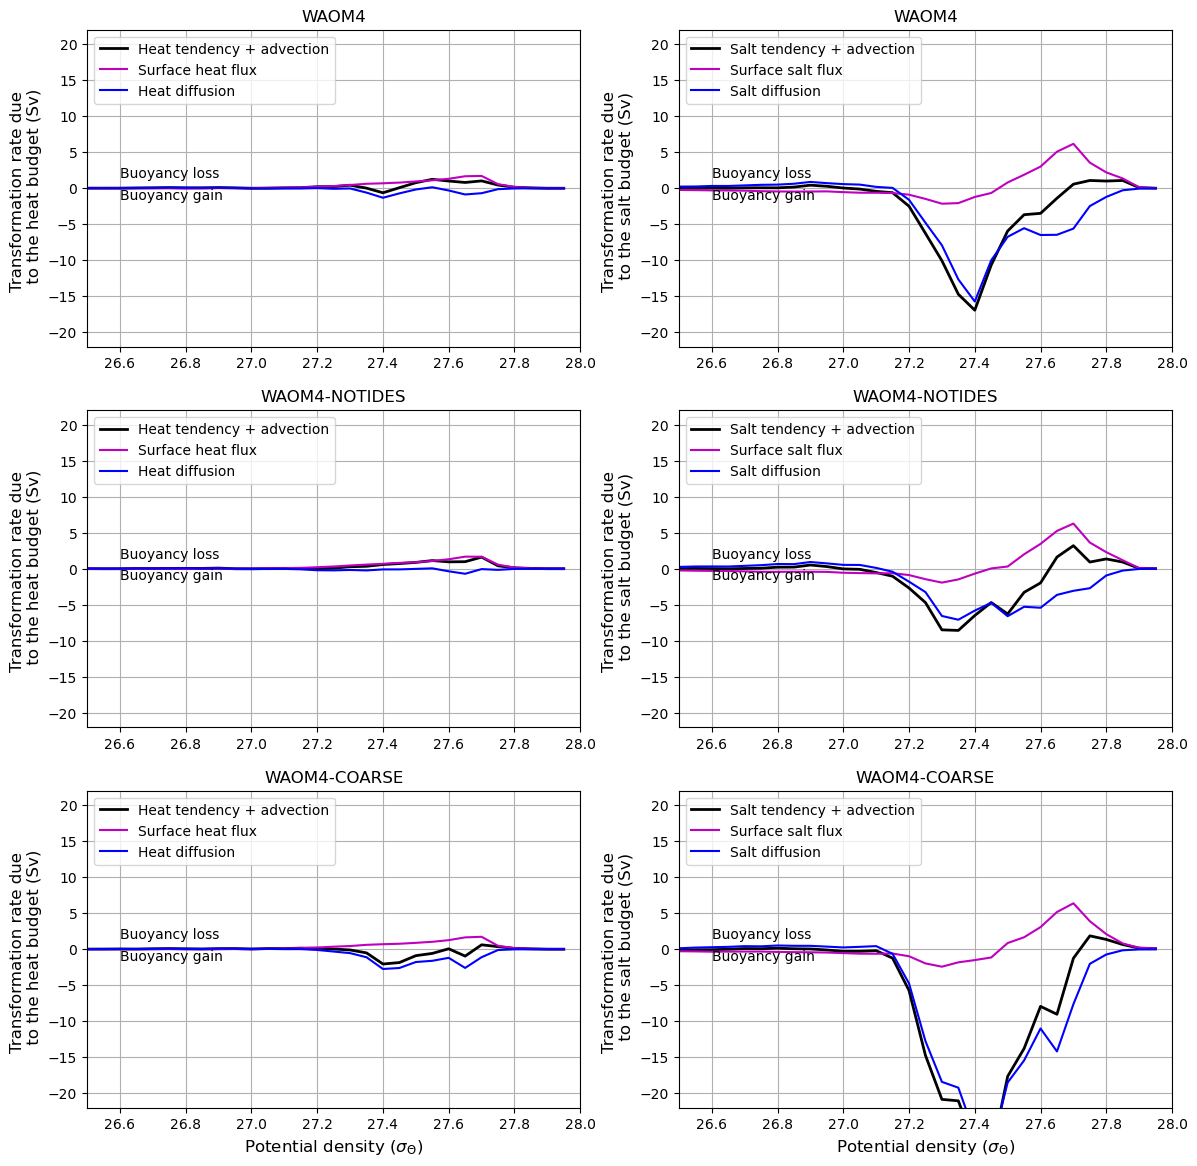

In [13]:
# rho_grid = WAOM4_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(14,14))

# BUDGET

ax1 = fig.add_subplot(321)
plt.title('WAOM4',fontsize=12)
cn=plt.plot(rho_grid,WAOM4_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM4_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,WAOM4_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
# ca=plt.plot(rho_grid,WAOM4_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'-r',label='Heat advection')
cd=plt.plot(rho_grid,WAOM4_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM4_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion')
plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
plt.legend(loc='upper left')
plt.xlim(26.5,28),plt.ylim(-22,22)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')

ax2 = fig.add_subplot(322)
plt.title('WAOM4',fontsize=12)
cn=plt.plot(rho_grid,-WAOM4_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM4_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
# ca=plt.plot(rho_grid,-WAOM4_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM4_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper left')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-22,22)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')

ax1 = fig.add_subplot(323)
plt.title('WAOM4-NOTIDES',fontsize=12)
cn=plt.plot(rho_grid,WAOM4_notides_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM4_notides_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,WAOM4_notides_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
# ca=plt.plot(rho_grid,WAOM4_notides_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'-r',label='Heat advection')
cd=plt.plot(rho_grid,WAOM4_notides_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM4_notides_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion')
plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
plt.legend(loc='upper left')
plt.xlim(26.5,28),plt.ylim(-22,22)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')

ax2 = fig.add_subplot(324)
plt.title('WAOM4-NOTIDES',fontsize=12)
cn=plt.plot(rho_grid,-WAOM4_notides_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM4_notides_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_notides_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
# ca=plt.plot(rho_grid,-WAOM4_notides_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_notides_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM4_notides_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper left')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-22,22)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')

ax1 = fig.add_subplot(325)
plt.title('WAOM4-COARSE',fontsize=12)
cn=plt.plot(rho_grid,WAOM4_10km_bathy_shelf_heat_net['Fh_sig_net_vint_shelf']-WAOM4_10km_bathy_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'k',label='Heat tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,WAOM4_10km_bathy_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-m',label='Surface heat flux')
# ca=plt.plot(rho_grid,WAOM4_10km_bathy_shelf_heat_adv['Fh_sig_adv_vint_shelf'],'-r',label='Heat advection')
cd=plt.plot(rho_grid,WAOM4_10km_bathy_shelf_heat_diff['Fh_sig_diff_vint_shelf']-WAOM4_10km_bathy_shelf_heat_sfc['Fh_sig_sfc_shelf'],'-b',label='Heat diffusion')
plt.ylabel('Transformation rate due \n to the heat budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.legend(loc='upper left')
plt.xlim(26.5,28),plt.ylim(-22,22)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')

ax2 = fig.add_subplot(326)
plt.title('WAOM4-COARSE',fontsize=12)
cn=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_salt_net['Fs_sig_net_vint_shelf']+WAOM4_10km_bathy_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'k',label='Salt tendency + advection',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-m',label='Surface salt flux')
# ca=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_salt_adv['Fs_sig_adv_vint_shelf'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_salt_diff['Fs_sig_diff_vint_shelf']+WAOM4_10km_bathy_shelf_salt_sfc['Fs_sig_sfc_shelf'],'-b',label='Salt diffusion')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper left')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-22,22)
plt.grid(True)
plt.text(26.6,1.5,'Buoyancy loss')
plt.text(26.6,-1.5,'Buoyancy gain')



name_fig="waom4extend_shflim_S_0.25Q_sensitive-expts_WMT_Full_vint_yr20_shelf_heat+salt-budget.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

In [14]:
WAOM10_iceshelf_salt_net = np.load(npy_path + 'WAOM10extend_Full_WMT_iceshelf_vint_salt_net.npz')
WAOM10_iceshelf_salt_net_subregions = np.load(npy_path + 'WAOM10extend_Full_WMT_iceshelf_vint_salt_net_subregions.npz')

WAOM10_iceshelf_salt_adv = np.load(npy_path + 'WAOM10extend_Full_WMT_iceshelf_vint_salt_adv.npz')
WAOM10_iceshelf_salt_adv_subregions = np.load(npy_path + 'WAOM10extend_Full_WMT_iceshelf_vint_salt_adv_subregions.npz')

WAOM10_iceshelf_salt_diff = np.load(npy_path + 'WAOM10extend_Full_WMT_iceshelf_vint_salt_diff.npz')
WAOM10_iceshelf_salt_diff_subregions = np.load(npy_path + 'WAOM10extend_Full_WMT_iceshelf_vint_salt_diff_subregions.npz')

WAOM10_shelf_noice_salt_net = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_noice_vint_salt_net.npz')
WAOM10_shelf_noice_salt_net_subregions = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_noice_vint_salt_net_subregions.npz')

WAOM10_shelf_noice_salt_adv = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_noice_vint_salt_adv.npz')
WAOM10_shelf_noice_salt_adv_subregions = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_noice_vint_salt_adv_subregions.npz')

WAOM10_shelf_noice_salt_diff = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_noice_vint_salt_diff.npz')
WAOM10_shelf_noice_salt_diff_subregions = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_noice_vint_salt_diff_subregions.npz')

print(WAOM10_shelf_salt_net.files, WAOM10_shelf_noice_salt_net_subregions.files)


['rho_grid', 'Fs_sig_net_vint_shelf'] ['rho_grid', 'Fs_sig_net_vint_shelf_noice_Wed', 'Fs_sig_net_vint_shelf_noice_Mau', 'Fs_sig_net_vint_shelf_noice_EAnt', 'Fs_sig_net_vint_shelf_noice_Ros', 'Fs_sig_net_vint_shelf_noice_WAnt']


In [15]:
WAOM4_iceshelf_salt_net = np.load(npy_path + 'WAOM4extend_Full_WMT_iceshelf_vint_salt_net.npz')
WAOM4_iceshelf_salt_net_subregions = np.load(npy_path + 'WAOM4extend_Full_WMT_iceshelf_vint_salt_net_subregions.npz')

WAOM4_iceshelf_salt_adv = np.load(npy_path + 'WAOM4extend_Full_WMT_iceshelf_vint_salt_adv.npz')
WAOM4_iceshelf_salt_adv_subregions = np.load(npy_path + 'WAOM4extend_Full_WMT_iceshelf_vint_salt_adv_subregions.npz')

WAOM4_iceshelf_salt_diff = np.load(npy_path + 'WAOM4extend_Full_WMT_iceshelf_vint_salt_diff.npz')
WAOM4_iceshelf_salt_diff_subregions = np.load(npy_path + 'WAOM4extend_Full_WMT_iceshelf_vint_salt_diff_subregions.npz')

WAOM4_shelf_noice_salt_net = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_noice_vint_salt_net.npz')
WAOM4_shelf_noice_salt_net_subregions = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_noice_vint_salt_net_subregions.npz')

WAOM4_shelf_noice_salt_adv = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_noice_vint_salt_adv.npz')
WAOM4_shelf_noice_salt_adv_subregions = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_noice_vint_salt_adv_subregions.npz')

WAOM4_shelf_noice_salt_diff = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_noice_vint_salt_diff.npz')
WAOM4_shelf_noice_salt_diff_subregions = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_noice_vint_salt_diff_subregions.npz')

print(WAOM4_shelf_noice_salt_net.files, WAOM4_shelf_noice_salt_net_subregions.files)


['rho_grid', 'Fs_sig_net_vint_shelf_noice'] ['rho_grid', 'Fs_sig_net_vint_shelf_noice_Wed', 'Fs_sig_net_vint_shelf_noice_Mau', 'Fs_sig_net_vint_shelf_noice_EAnt', 'Fs_sig_net_vint_shelf_noice_Ros', 'Fs_sig_net_vint_shelf_noice_WAnt']


In [16]:
# load sensitivity experiments subregions:
WAOM4_notides_iceshelf_salt_net_subregions = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_vint_salt_net_subregions.npz')
WAOM4_notides_iceshelf_salt_adv_subregions = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_vint_salt_adv_subregions.npz')
WAOM4_notides_iceshelf_salt_diff_subregions = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_vint_salt_diff_subregions.npz')
WAOM4_notides_iceshelf_sfc_salt_subregions = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_iceshelf_sfc_salt_subregions.npz')


WAOM4_10km_bathy_iceshelf_salt_net_subregions = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_vint_salt_net_subregions.npz')
WAOM4_10km_bathy_iceshelf_salt_adv_subregions = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_vint_salt_adv_subregions.npz')
WAOM4_10km_bathy_iceshelf_salt_diff_subregions = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_vint_salt_diff_subregions.npz')
WAOM4_10km_bathy_iceshelf_sfc_salt_subregions = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_iceshelf_sfc_salt_subregions.npz')




In [17]:
# WAOM4_notides_shelf_noice_salt_net_subregions = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_vint_salt_net_subregions.npz')
# WAOM4_notides_shelf_noice_salt_adv_subregions = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_vint_salt_adv_subregions.npz')
# WAOM4_notides_shelf_noice_salt_diff_subregions = np.load(npy_path + 'WAOM4extend_notides_Full_WMT_shelf_noice_vint_salt_diff_subregions.npz')

# WAOM4_10km_bathy_shelf_noice_salt_net_subregions = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_vint_salt_net_subregions.npz')
# WAOM4_10km_bathy_shelf_noice_salt_adv_subregions = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_vint_salt_adv_subregions.npz')
# WAOM4_10km_bathy_shelf_noice_salt_diff_subregions = np.load(npy_path + 'WAOM4extend_10km-bathy_Full_WMT_shelf_noice_vint_salt_diff_subregions.npz')



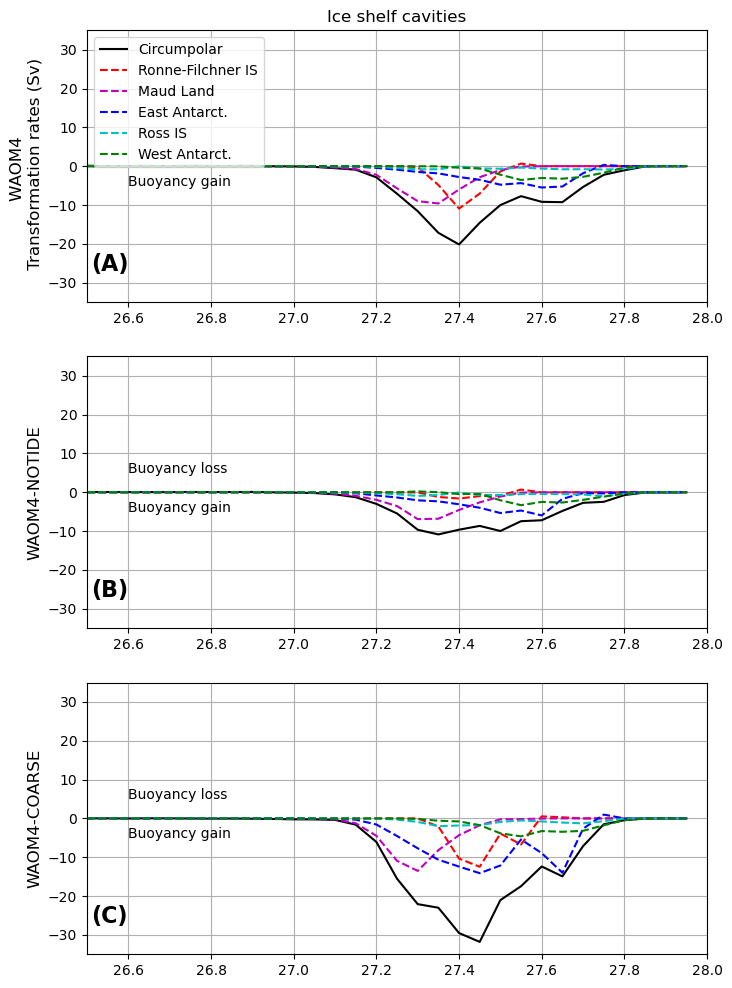

In [19]:
fig = plt.figure(figsize=(8,12))

# SALT BUDGET

ax1 = fig.add_subplot(311)
plt.title('Ice shelf cavities')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff['Fs_sig_diff_vint_iceshelf'],'-k',label='Circumpolar')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'],'--r',label='Ronne-Filchner IS')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Mau'],'--m',label='Maud Land')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt'],'--b',label='East Antarct.')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Ros'],'--c',label='Ross IS')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt'],'--g',label='West Antarct.')
plt.legend(loc=2)
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel('WAOM4 \n Transformation rates (Sv)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-35,35)
plt.grid(True)
# plt.text(26.6,5,'Buoyancy loss')
plt.text(26.6,-5,'Buoyancy gain')
plt.text(26.51,-27,'(A)',fontsize=16,weight="bold")

ax2 = fig.add_subplot(312)
cs=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff['Fs_sig_diff_vint_iceshelf'],'-k',label='Circumpolar')
cs=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'],'--r',label='Ronne-Filchner IS')
cs=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Mau'],'--m',label='Maud Land')
cs=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt'],'--b',label='East Antarct.')
cs=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Ros'],'--c',label='Ross IS')
cs=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt'],'--g',label='West Antarct.')
#plt.legend()
plt.ylabel('WAOM4-NOTIDE',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-35,35)
plt.grid(True)
plt.text(26.6,5,'Buoyancy loss')
plt.text(26.6,-5,'Buoyancy gain')
plt.text(26.51,-27,'(B)',fontsize=16,weight="bold")

ax3 = fig.add_subplot(313)
cs=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff['Fs_sig_diff_vint_iceshelf'],'-k',label='Circumpolar')
cs=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'],'--r',label='Ronne-Filchner IS')
cs=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Mau'],'--m',label='Maud Land')
cs=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt'],'--b',label='East Antarct.')
cs=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Ros'],'--c',label='Ross IS')
cs=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt'],'--g',label='West Antarct.')
plt.ylabel('WAOM4-COARSE',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-35,35)
plt.grid(True)
plt.text(26.6,5,'Buoyancy loss')
plt.text(26.6,-5,'Buoyancy gain')
plt.text(26.51,-27,'(C)',fontsize=16,weight="bold")

## cont shelf
# ax1 = fig.add_subplot(312)
# plt.title('Continental shelf ')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff['Fs_sig_diff_vint_shelf_noice'],'-k',label='Circumpolar')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'],'--r',label='Ronne-Filchner IS')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'],'--m',label='Maud Land')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'],'--b',label='East Antarct.')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'],'--c',label='Ross IS')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt'],'--g',label='West Antarct.')
# plt.legend()
# plt.ylabel('WAOM4 \n Transformation rates (Sv)',fontsize=12)
# plt.xlim(26.5,28),plt.ylim(-35,35)
# plt.grid(True)
# plt.text(26.6,0.25,'Buoyancy loss')
# plt.text(26.6,-.25,'Buoyancy gain')
# plt.text(26.51,-5,'(B)',fontsize=16,weight="bold")

# ax2 = fig.add_subplot(314)
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff['Fs_sig_diff_vint_shelf_noice'],'-k',label='Circumpolar')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'],'--r',label='Ronne-Filchner IS')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'],'--m',label='Maud Land')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'],'--b',label='East Antarct.')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'],'--c',label='Ross IS')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt'],'--g',label='West Antarct.')
# #plt.legend()
# plt.ylabel('WAOM4-NOTIDES',fontsize=12)
# plt.xlim(26.5,28),plt.ylim(-35,35)
# plt.grid(True)
# plt.text(26.6,0.25,'Buoyancy loss')
# plt.text(26.6,-.25,'Buoyancy gain')
# plt.text(26.51,-5,'(D)',fontsize=16,weight="bold")

# ax3 = fig.add_subplot(316)
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff['Fs_sig_diff_vint_shelf_noice'],'-k',label='Circumpolar')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'],'--r',label='Ronne-Filchner IS')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'],'--m',label='Maud Land')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'],'--b',label='East Antarct.')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'],'--c',label='Ross IS')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt'],'--g',label='West Antarct.')
# plt.ylabel('WAOM4-COARSE',fontsize=12)
# plt.xlim(26.5,28),plt.ylim(-35,35)
# plt.grid(True)
# plt.text(26.6,0.25,'Buoyancy loss')
# plt.text(26.6,-.25,'Buoyancy gain')
# plt.text(26.51,-5,'(F)',fontsize=16,weight="bold")


name_fig="waom4extend_shflim_S_0.25Q_sensitive-expts_WMT_Full_vint_yr20_iceshelf_subregions_salt-budget.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()


In [21]:
# ax1 = fig.add_subplot(322)
# plt.title('Continental shelf ')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff['Fs_sig_diff_vint_shelf_noice'],'-k',label='Circumpolar')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'],'--r',label='Ronne-Filchner IS')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'],'--m',label='Maud Land')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'],'--b',label='East Antarct.')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'],'--c',label='Ross IS')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt'],'--g',label='West Antarct.')
# plt.legend()
# plt.ylabel('WAOM4 \n Transformation rates (Sv)',fontsize=12)
# plt.xlim(26.5,28),plt.ylim(-35,35)
# plt.grid(True)
# plt.text(26.6,0.25,'Buoyancy loss')
# plt.text(26.6,-.25,'Buoyancy gain')
# plt.text(26.51,-5,'(B)',fontsize=16,weight="bold")

# ax2 = fig.add_subplot(324)
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff['Fs_sig_diff_vint_shelf_noice'],'-k',label='Circumpolar')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'],'--r',label='Ronne-Filchner IS')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'],'--m',label='Maud Land')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'],'--b',label='East Antarct.')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'],'--c',label='Ross IS')
# cs=plt.plot(rho_grid,-WAOM4_notides_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt'],'--g',label='West Antarct.')
# #plt.legend()
# plt.ylabel('WAOM4-NOTIDES',fontsize=12)
# plt.xlim(26.5,28),plt.ylim(-35,35)
# plt.grid(True)
# plt.text(26.6,0.25,'Buoyancy loss')
# plt.text(26.6,-.25,'Buoyancy gain')
# plt.text(26.51,-5,'(D)',fontsize=16,weight="bold")

# ax3 = fig.add_subplot(326)
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff['Fs_sig_diff_vint_shelf_noice'],'-k',label='Circumpolar')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'],'--r',label='Ronne-Filchner IS')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'],'--m',label='Maud Land')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'],'--b',label='East Antarct.')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'],'--c',label='Ross IS')
# cs=plt.plot(rho_grid,-WAOM4_10km_bathy_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt'],'--g',label='West Antarct.')
# plt.ylabel('WAOM4-COARSE',fontsize=12)
# plt.xlim(26.5,28),plt.ylim(-35,35)
# plt.grid(True)
# plt.text(26.6,0.25,'Buoyancy loss')
# plt.text(26.6,-.25,'Buoyancy gain')
# plt.text(26.51,-5,'(F)',fontsize=16,weight="bold")

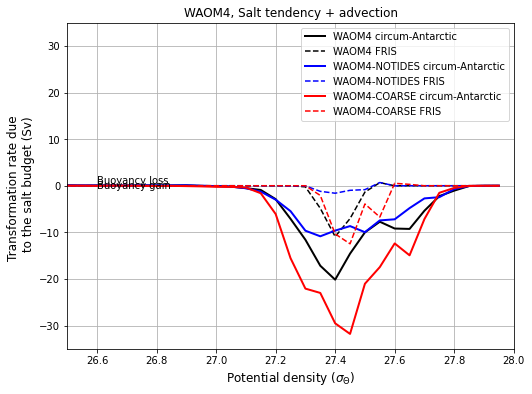

In [22]:
fig = plt.figure(figsize=(8,6))

# BUDGET

ax1 = fig.add_subplot(111)
plt.title('WAOM4, Salt tendency + advection',fontsize=12)
cn=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff['Fs_sig_diff_vint_iceshelf'],'k',label='WAOM4 circum-Antarctic',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'],'--k',label='WAOM4 FRIS')

cn=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff['Fs_sig_diff_vint_iceshelf'],'b',label='WAOM4-NOTIDES circum-Antarctic',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'],'--b',label='WAOM4-NOTIDES FRIS')

cn=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff['Fs_sig_diff_vint_iceshelf'],'r',label='WAOM4-COARSE circum-Antarctic',linewidth=2)
cs=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'],'--r',label='WAOM4-COARSE FRIS')

plt.legend(loc='upper right')
plt.ylabel('Transformation rate due \n to the salt budget (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-35,35)
plt.grid(True)
plt.text(26.6,.5,'Buoyancy loss')
plt.text(26.6,-.5,'Buoyancy gain')


name_fig="waom4extend_shflim_S_0.25Q_sensitive-expts_WMT_Full_vint_yr20_iceshelf_diff_salt_tendency.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

In [23]:
WAOM2_iceshelf_salt_net = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_net.npz')
WAOM2_iceshelf_salt_net_Wed = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_net_Wed.npz')
WAOM2_iceshelf_salt_net_Mau = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_net_Mau.npz')
WAOM2_iceshelf_salt_net_EAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_net_EAnt.npz')
WAOM2_iceshelf_salt_net_Ros = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_net_Ros.npz')
WAOM2_iceshelf_salt_net_WAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_net_WAnt.npz')

WAOM2_shelf_noice_salt_net = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_net.npz')
WAOM2_shelf_noice_salt_net_Wed = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_net_Wed.npz')
WAOM2_shelf_noice_salt_net_Mau = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_net_Mau.npz')
WAOM2_shelf_noice_salt_net_EAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_net_EAnt.npz')
WAOM2_shelf_noice_salt_net_Ros = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_net_Ros.npz')
WAOM2_shelf_noice_salt_net_WAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_net_WAnt.npz')


print(WAOM2_shelf_salt_net.files, WAOM2_shelf_noice_salt_net_Wed.files)


['rho_grid', 'Fs_sig_net_vint_shelf'] ['rho_grid', 'Fs_sig_net_vint_shelf_noice_Wed']


In [24]:
WAOM2_iceshelf_salt_adv = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_adv.npz')
WAOM2_iceshelf_salt_adv_Wed = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_adv_Wed.npz')
WAOM2_iceshelf_salt_adv_Mau = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_adv_Mau.npz')
WAOM2_iceshelf_salt_adv_EAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_adv_EAnt.npz')
WAOM2_iceshelf_salt_adv_Ros = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_adv_Ros.npz')
WAOM2_iceshelf_salt_adv_WAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_adv_WAnt.npz')

WAOM2_iceshelf_salt_diff = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_diff.npz')
WAOM2_iceshelf_salt_diff_Wed = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_diff_Wed.npz')
WAOM2_iceshelf_salt_diff_Mau = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_diff_Mau.npz')
WAOM2_iceshelf_salt_diff_EAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_diff_EAnt.npz')
WAOM2_iceshelf_salt_diff_Ros = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_diff_Ros.npz')
WAOM2_iceshelf_salt_diff_WAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_vint_salt_diff_WAnt.npz')


In [25]:
WAOM2_shelf_noice_salt_adv = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_adv.npz')
WAOM2_shelf_noice_salt_adv_Wed = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_adv_Wed.npz')
WAOM2_shelf_noice_salt_adv_Mau = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_adv_Mau.npz')
WAOM2_shelf_noice_salt_adv_EAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_adv_EAnt.npz')
WAOM2_shelf_noice_salt_adv_Ros = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_adv_Ros.npz')
WAOM2_shelf_noice_salt_adv_WAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_adv_WAnt.npz')

WAOM2_shelf_noice_salt_diff = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_diff.npz')
WAOM2_shelf_noice_salt_diff_Wed = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_diff_Wed.npz')
WAOM2_shelf_noice_salt_diff_Mau = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_diff_Mau.npz')
WAOM2_shelf_noice_salt_diff_EAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_diff_EAnt.npz')
WAOM2_shelf_noice_salt_diff_Ros = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_diff_Ros.npz')
WAOM2_shelf_noice_salt_diff_WAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_vint_salt_diff_WAnt.npz')


In [26]:
# surface fluxes
WAOM10_iceshelf_sfc_salt_subregions = np.load(npy_path + 'WAOM10extend_Full_WMT_iceshelf_sfc_salt_subregions.npz')
WAOM10_shelf_noice_sfc_salt_subregions = np.load(npy_path + 'WAOM10extend_Full_WMT_shelf_noice_sfc_salt_subregions.npz')

WAOM4_iceshelf_sfc_salt_subregions = np.load(npy_path + 'WAOM4extend_Full_WMT_iceshelf_sfc_salt_subregions.npz')
WAOM4_shelf_noice_sfc_salt_subregions = np.load(npy_path + 'WAOM4extend_Full_WMT_shelf_noice_sfc_salt_subregions.npz')

WAOM2_iceshelf_sfc_salt = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_sfc_salt.npz')
WAOM2_iceshelf_sfc_salt_Wed = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_sfc_salt_Wed.npz')
WAOM2_iceshelf_sfc_salt_Mau = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_sfc_salt_Mau.npz')
WAOM2_iceshelf_sfc_salt_EAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_sfc_salt_EAnt.npz')
WAOM2_iceshelf_sfc_salt_Ros = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_sfc_salt_Ros.npz')
WAOM2_iceshelf_sfc_salt_WAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_iceshelf_sfc_salt_WAnt.npz')

WAOM2_shelf_noice_sfc_salt = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_sfc_salt.npz')
WAOM2_shelf_noice_sfc_salt_Wed = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_sfc_salt_Wed.npz')
WAOM2_shelf_noice_sfc_salt_Mau = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_sfc_salt_Mau.npz')
WAOM2_shelf_noice_sfc_salt_EAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_sfc_salt_EAnt.npz')
WAOM2_shelf_noice_sfc_salt_Ros = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_sfc_salt_Ros.npz')
WAOM2_shelf_noice_sfc_salt_WAnt = np.load(npy_path + 'WAOM2extend_Full_WMT_shelf_noice_sfc_salt_WAnt.npz')


print(WAOM2_iceshelf_sfc_salt.files, WAOM2_shelf_noice_sfc_salt_Wed.files)



['rho_grid', 'Fs_sig_sfc_iceshelf'] ['rho_grid', 'Fs_sig_sfc_shelf_noice_Wed']


In [27]:
# test sum all sub-regions:
WAOM10_iceshelf_salt_diff_sum = WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'] + \
    WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Mau'] + \
    WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt'] + \
    WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Ros'] + \
    WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt']

# test sum all sub-regions:
WAOM10_shelf_noice_salt_diff_sum = WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'] + \
    WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'] + \
    WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'] + \
    WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'] + \
    WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt']

# test sum all sub-regions:
WAOM4_iceshelf_salt_diff_sum = WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'] + \
    WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Mau'] + \
    WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt'] + \
    WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Ros'] + \
    WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt']

# test sum all sub-regions:
WAOM4_shelf_noice_salt_diff_sum = WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'] + \
    WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'] + \
    WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'] + \
    WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'] + \
    WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt']

# test sum all sub-regions:
WAOM2_iceshelf_salt_diff_sum = WAOM2_iceshelf_salt_diff_Wed['Fs_sig_diff_vint_iceshelf_Wed'] + \
    WAOM2_iceshelf_salt_diff_Mau['Fs_sig_diff_vint_iceshelf_Mau'] + \
    WAOM2_iceshelf_salt_diff_EAnt['Fs_sig_diff_vint_iceshelf_EAnt'] + \
    WAOM2_iceshelf_salt_diff_Ros['Fs_sig_diff_vint_iceshelf_Ros'] + \
    WAOM2_iceshelf_salt_diff_WAnt['Fs_sig_diff_vint_iceshelf_WAnt']

# test sum all sub-regions:
WAOM2_shelf_noice_salt_diff_sum = WAOM2_shelf_noice_salt_diff_Wed['Fs_sig_diff_vint_shelf_noice_Wed'] + \
    WAOM2_shelf_noice_salt_diff_Mau['Fs_sig_diff_vint_shelf_noice_Mau'] + \
    WAOM2_shelf_noice_salt_diff_EAnt['Fs_sig_diff_vint_shelf_noice_EAnt'] + \
    WAOM2_shelf_noice_salt_diff_Ros['Fs_sig_diff_vint_shelf_noice_Ros'] + \
    WAOM2_shelf_noice_salt_diff_WAnt['Fs_sig_diff_vint_shelf_noice_WAnt']


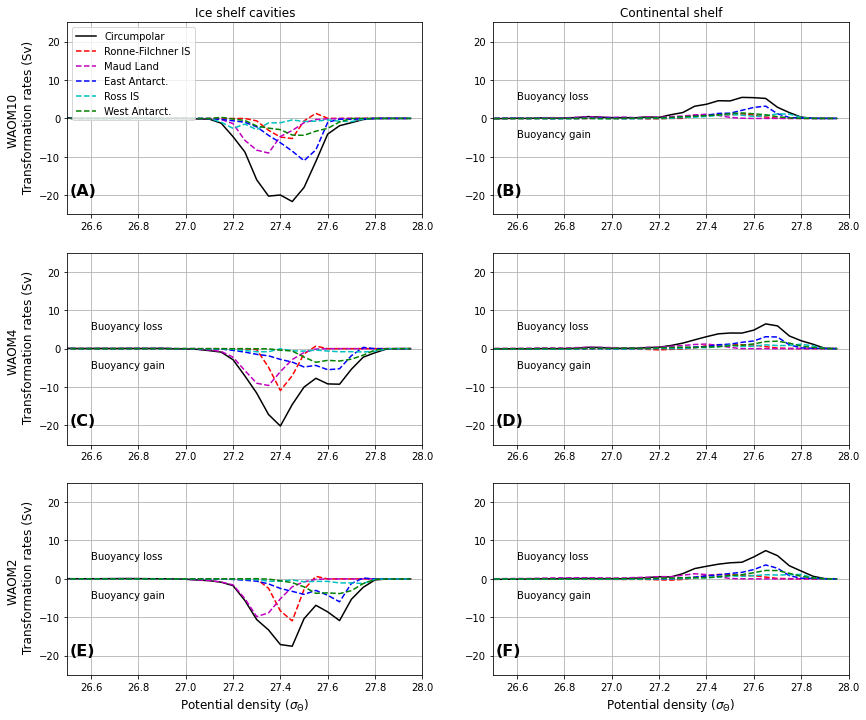

In [28]:

fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(321)
plt.title('Ice shelf cavities')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff['Fs_sig_diff_vint_iceshelf'],'-k',label='Circumpolar')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'],'--r',label='Ronne-Filchner IS')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Mau'],'--m',label='Maud Land')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt'],'--b',label='East Antarct.')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Ros'],'--c',label='Ross IS')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt'],'--g',label='West Antarct.')
# cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_sum,'--y',label='total sum')
plt.legend(loc=2)
plt.ylabel('WAOM10 \n Transformation rates (Sv)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-25,25)
plt.grid(True)
#plt.text(26.6,5,'Buoyancy loss')
# plt.text(26.6,-5,'Buoyancy gain')
plt.text(26.51,-20,'(A)',fontsize=16,weight="bold")

#
ax2 = fig.add_subplot(322)
plt.title('Continental shelf')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff['Fs_sig_diff_vint_shelf_noice'],'-k',label='Circumpolar')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'],'--r',label='Ronne-Filchner IS')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'],'--m',label='Maud Land')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'],'--b',label='East Antarct.')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'],'--c',label='Ross IS')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt'],'--g',label='West Antarct.')
# cs=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_sum,'--y',label='total sum')
#plt.legend()
#plt.ylabel('WAOM10 - WMT rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-25,25)
plt.grid(True)
plt.text(26.6,5,'Buoyancy loss')
plt.text(26.6,-5,'Buoyancy gain')
plt.text(26.51,-20,'(B)',fontsize=16,weight="bold")

#
ax3 = fig.add_subplot(323)
#plt.title('Ice shelf cavities')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff['Fs_sig_diff_vint_iceshelf'],'-k',label='Circumpolar')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed'],'--r',label='Ronne-Filchner IS')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Mau'],'--m',label='Maud Land')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt'],'--b',label='East Antarct.')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Ros'],'--c',label='Ross IS')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt'],'--g',label='West Antarct.')
# cs=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_sum,'--y',label='total sum')
#plt.legend()
plt.ylabel('WAOM4 \n Transformation rates (Sv)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-25,25)
plt.grid(True)
plt.text(26.6,5,'Buoyancy loss')
plt.text(26.6,-5,'Buoyancy gain')
plt.text(26.51,-20,'(C)',fontsize=16,weight="bold")

#
ax4 = fig.add_subplot(324)
#plt.title('Continental shelf')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff['Fs_sig_diff_vint_shelf_noice'],'-k',label='Circumpolar')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed'],'--r',label='Ronne-Filchner IS')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau'],'--m',label='Maud Land')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt'],'--b',label='East Antarct.')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros'],'--c',label='Ross IS')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt'],'--g',label='West Antarct.')
# cs=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_sum,'--y',label='total sum')
#plt.legend()
#plt.ylabel('WAOM4 - WMT rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-25,25)
plt.grid(True)
plt.text(26.6,5,'Buoyancy loss')
plt.text(26.6,-5,'Buoyancy gain')
plt.text(26.51,-20,'(D)',fontsize=16,weight="bold")

#
ax5 = fig.add_subplot(325)
#plt.title('Ice shelf cavities')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff['Fs_sig_diff_vint_iceshelf'],'-k',label='Circumpolar')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_Wed['Fs_sig_diff_vint_iceshelf_Wed'],'--r',label='Ronne-Filchner IS')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_Mau['Fs_sig_diff_vint_iceshelf_Mau'],'--m',label='Maud Land')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_EAnt['Fs_sig_diff_vint_iceshelf_EAnt'],'--b',label='East Antarct.')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_Ros['Fs_sig_diff_vint_iceshelf_Ros'],'--c',label='Ross IS')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_WAnt['Fs_sig_diff_vint_iceshelf_WAnt'],'--g',label='West Antarct.')
# cs=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_sum,'--y',label='total sum')
#plt.legend()
plt.ylabel('WAOM2 \n Transformation rates (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-25,25)
plt.grid(True)
plt.text(26.6,5,'Buoyancy loss')
plt.text(26.6,-5,'Buoyancy gain')
plt.text(26.51,-20,'(E)',fontsize=16,weight="bold")

#
ax6 = fig.add_subplot(326)
#plt.title('Continental shelf')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff['Fs_sig_diff_vint_shelf_noice'],'-k',label='Circumpolar')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_Wed['Fs_sig_diff_vint_shelf_noice_Wed'],'--r',label='Ronne-Filchner IS')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_Mau['Fs_sig_diff_vint_shelf_noice_Mau'],'--m',label='Maud Land')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_EAnt['Fs_sig_diff_vint_shelf_noice_EAnt'],'--b',label='East Antarct.')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_Ros['Fs_sig_diff_vint_shelf_noice_Ros'],'--c',label='Ross IS')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_WAnt['Fs_sig_diff_vint_shelf_noice_WAnt'],'--g',label='West Antarct.')
# cs=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_sum,'--y',label='total sum')
#plt.legend()
#plt.ylabel('WAOM2 - WMT rate (Sv)')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-25,25)
plt.grid(True)
plt.text(26.6,5,'Buoyancy loss')
plt.text(26.6,-5,'Buoyancy gain')
plt.text(26.51,-20,'(F)',fontsize=16,weight="bold")

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMT_Full_vint_yr20_iceshelfXshelf_noice_subregions.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

In [29]:
print(rho_grid[36])

27.800000000000026


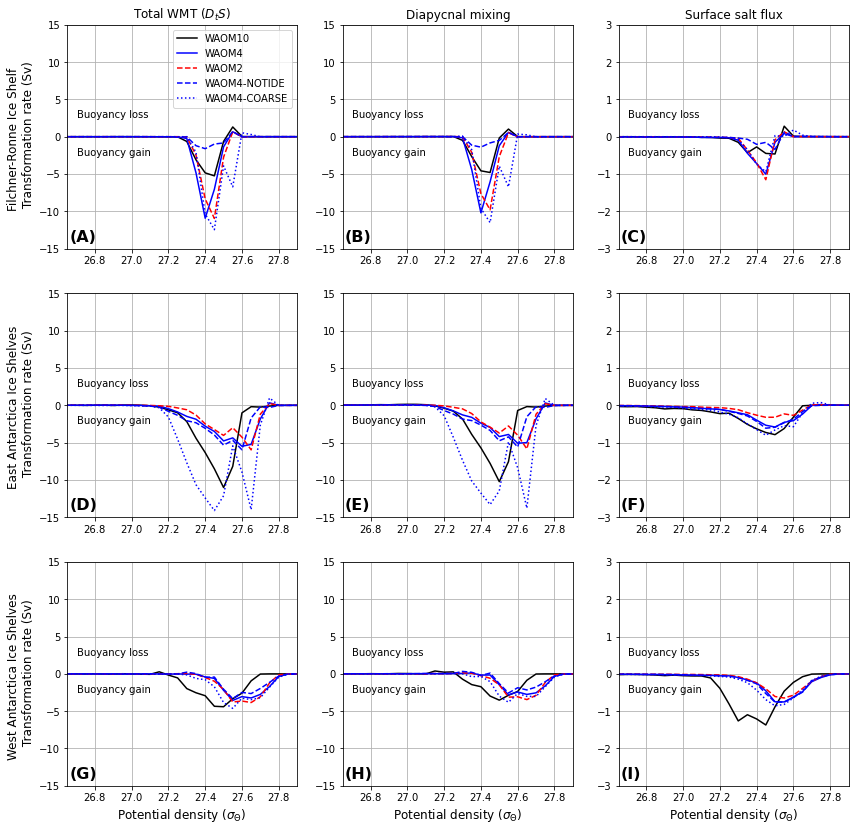

In [40]:

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(331)
plt.title('Total WMT ($D_t S$)')
cn=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Wed']+WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Wed'],'k',label='WAOM10')#: Total WMT')
cn=plt.plot(rho_grid,-WAOM4_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Wed']+WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Wed'],'-b',label='WAOM4')#: Total WMT')
cn=plt.plot(rho_grid,-WAOM2_iceshelf_salt_net_Wed['Fs_sig_net_vint_iceshelf_Wed']+WAOM2_iceshelf_salt_adv_Wed['Fs_sig_adv_vint_iceshelf_Wed'],'--r',label='WAOM2')#: Total WMT')
cn=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Wed']+WAOM4_notides_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Wed'],'--b',label='WAOM4-NOTIDE')#: Total WMT')
cn=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Wed']+WAOM4_10km_bathy_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Wed'],':b',label='WAOM4-COARSE')#: Total WMT')
plt.ylabel('Filchner-Ronne Ice Shelf \n Transformation rate (Sv)',fontsize=12)
plt.legend()#bbox_to_anchor=(1,1), loc="upper left")
plt.xlim(26.65,27.9),plt.ylim(-15,15)
plt.grid(True)
plt.text(26.7,2.5,'Buoyancy loss')
plt.text(26.7,-2.5,'Buoyancy gain')
plt.text(26.66,-14,'(A)',fontsize=16,weight="bold")


ax2 = fig.add_subplot(332)
plt.title('Diapycnal mixing')
cd=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed']+WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'-k',label='WAOM10')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed']+WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'-b',label='WAOM4')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_Wed['Fs_sig_diff_vint_iceshelf_Wed']+WAOM2_iceshelf_sfc_salt_Wed['Fs_sig_sfc_iceshelf_Wed'],'--r',label='WAOM2')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed']+WAOM4_notides_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'--b',label='WAOM4-NOTIDE')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed']+WAOM4_10km_bathy_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],':b',label='WAOM4-COARSE')#: Sfc flux')
plt.xlim(26.65,27.9),plt.ylim(-15,15)
plt.grid(True)
plt.text(26.7,2.5,'Buoyancy loss')
plt.text(26.7,-2.5,'Buoyancy gain')
plt.text(26.66,-14,'(B)',fontsize=16,weight="bold")

ax2 = fig.add_subplot(333)
plt.title('Surface salt flux')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'-k',label='WAOM10')#: Mixing')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'-b',label='WAOM4')#: Mixing')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_sfc_salt_Wed['Fs_sig_sfc_iceshelf_Wed'],'--r',label='WAOM2')#: Mixing')
cs=plt.plot(rho_grid,-WAOM4_notides_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'--b',label='WAOM4-NOTIDE')#: Mixing')
cs=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],':b',label='WAOM4-COARSE')#: Mixing')
plt.xlim(26.65,27.9),plt.ylim(-3,3)
plt.grid(True)
plt.text(26.7,.5,'Buoyancy loss')
plt.text(26.7,-.5,'Buoyancy gain')
plt.text(26.66,-2.8,'(C)',fontsize=16,weight="bold")

# East Antarctica
ax4 = fig.add_subplot(334)
# plt.title('Total WMT ($D_t S$)')
cn=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_EAnt']+WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_EAnt'],'-k',label='WAOM10')#: Total WMT')
cn=plt.plot(rho_grid,-WAOM4_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_EAnt']+WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_EAnt'],'-b',label='WAOM4')#: Total WMT')
cn=plt.plot(rho_grid,-WAOM2_iceshelf_salt_net_EAnt['Fs_sig_net_vint_iceshelf_EAnt']+WAOM2_iceshelf_salt_adv_EAnt['Fs_sig_adv_vint_iceshelf_EAnt'],'--r',label='WAOM2')#: Total WMT')
cn=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_EAnt']+WAOM4_notides_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_EAnt'],'--b',label='WAOM4-NOTIDE')#: Total WMT')
cn=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_EAnt']+WAOM4_10km_bathy_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_EAnt'],':b',label='WAOM4-COARSE')#: Total WMT')
plt.ylabel('East Antarctica Ice Shelves \n Transformation rate (Sv)',fontsize=12)
plt.xlim(26.65,27.9),plt.ylim(-15,15)
plt.grid(True)
plt.text(26.7,2.5,'Buoyancy loss')
plt.text(26.7,-2.5,'Buoyancy gain')
plt.text(26.66,-14,'(D)',fontsize=16,weight="bold")

ax5 = fig.add_subplot(335)
# plt.title('Diapycnal mixing')
cd=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt']+WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'-k',label='WAOM10')#: Mixing')
cd=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt']+WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'-b',label='WAOM4')#: Mixing')
cd=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_EAnt['Fs_sig_diff_vint_iceshelf_EAnt']+WAOM2_iceshelf_sfc_salt_EAnt['Fs_sig_sfc_iceshelf_EAnt'],'--r',label='WAOM2')#: Mixing')
cd=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt']+WAOM4_notides_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'--b',label='WAOM4-NOTIDE')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt']+WAOM4_10km_bathy_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],':b',label='WAOM4-COARSE')#: Sfc flux')
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlim(26.65,27.9),plt.ylim(-15,15)
plt.grid(True)
plt.text(26.7,2.5,'Buoyancy loss')
plt.text(26.7,-2.5,'Buoyancy gain')
plt.text(26.66,-14,'(E)',fontsize=16,weight="bold")

ax6 = fig.add_subplot(336)
# plt.title('Surface salt flux')
cd=plt.plot(rho_grid,-WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'-k',label='WAOM10')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'-b',label='WAOM4')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM2_iceshelf_sfc_salt_EAnt['Fs_sig_sfc_iceshelf_EAnt'],'--r',label='WAOM2')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM4_notides_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'--b',label='WAOM4-NOTIDE')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],':b',label='WAOM4-COARSE')#: Sfc flux')
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlim(26.65,27.9),plt.ylim(-3,3)
plt.grid(True)
plt.text(26.7,.5,'Buoyancy loss')
plt.text(26.7,-.5,'Buoyancy gain')
plt.text(26.66,-2.8,'(F)',fontsize=16,weight="bold")

# West Antarctica
ax7 = fig.add_subplot(337)
# plt.title('Total WMT ($D_t S$)')
cn=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_WAnt']+WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_WAnt'],'k',label='WAOM10')
cn=plt.plot(rho_grid,-WAOM4_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_WAnt']+WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_WAnt'],'-b',label='WAOM4')
cn=plt.plot(rho_grid,-WAOM2_iceshelf_salt_net_WAnt['Fs_sig_net_vint_iceshelf_WAnt']+WAOM2_iceshelf_salt_adv_WAnt['Fs_sig_adv_vint_iceshelf_WAnt'],'--r',label='WAOM2')
cn=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_WAnt']+WAOM4_notides_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_WAnt'],'--b',label='WAOM4-NOTIDE')#: Total WMT')
cn=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_WAnt']+WAOM4_10km_bathy_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_WAnt'],':b',label='WAOM4-COARSE')#: Total WMT')
plt.ylabel('West Antarctica Ice Shelves \n Transformation rate (Sv)',fontsize=12)
plt.xlim(26.65,27.9),plt.ylim(-15,15)
plt.grid(True)
plt.text(26.7,2.5,'Buoyancy loss')
plt.text(26.7,-2.5,'Buoyancy gain')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.text(26.66,-14,'(G)',fontsize=16,weight="bold")

ax8 = fig.add_subplot(338)
# plt.title('Diapycnal mixing')
cd=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt']+WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'-k',label='WAOM10')
cd=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt']+WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'-b',label='WAOM4')
cd=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_WAnt['Fs_sig_diff_vint_iceshelf_WAnt']+WAOM2_iceshelf_sfc_salt_WAnt['Fs_sig_sfc_iceshelf_WAnt'],'--r',label='WAOM2')
cd=plt.plot(rho_grid,-WAOM4_notides_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt']+WAOM4_notides_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'--b',label='WAOM4-NOTIDE')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt']+WAOM4_10km_bathy_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],':b',label='WAOM4-COARSE')#: Sfc flux')
plt.xlim(26.65,27.9),plt.ylim(-15,15)
plt.grid(True)
plt.text(26.7,2.5,'Buoyancy loss')
plt.text(26.7,-2.5,'Buoyancy gain')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.text(26.66,-14,'(H)',fontsize=16,weight="bold")

ax9 = fig.add_subplot(339)
# plt.title('Surface salt flux')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'-k',label='WAOM10')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'-b',label='WAOM4')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_sfc_salt_WAnt['Fs_sig_sfc_iceshelf_WAnt'],'--r',label='WAOM2')
cd=plt.plot(rho_grid,-WAOM4_notides_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'--b',label='WAOM4-NOTIDE')#: Sfc flux')
cd=plt.plot(rho_grid,-WAOM4_10km_bathy_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],':b',label='WAOM4-COARSE')#: Sfc flux')
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlim(26.65,27.9),plt.ylim(-3,3)
plt.grid(True)
plt.text(26.7,.5,'Buoyancy loss')
plt.text(26.7,-.5,'Buoyancy gain')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.text(26.66,-2.8,'(I)',fontsize=16,weight="bold")

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMT_Full_budget_vint_yr20_iceshelf_subregions.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


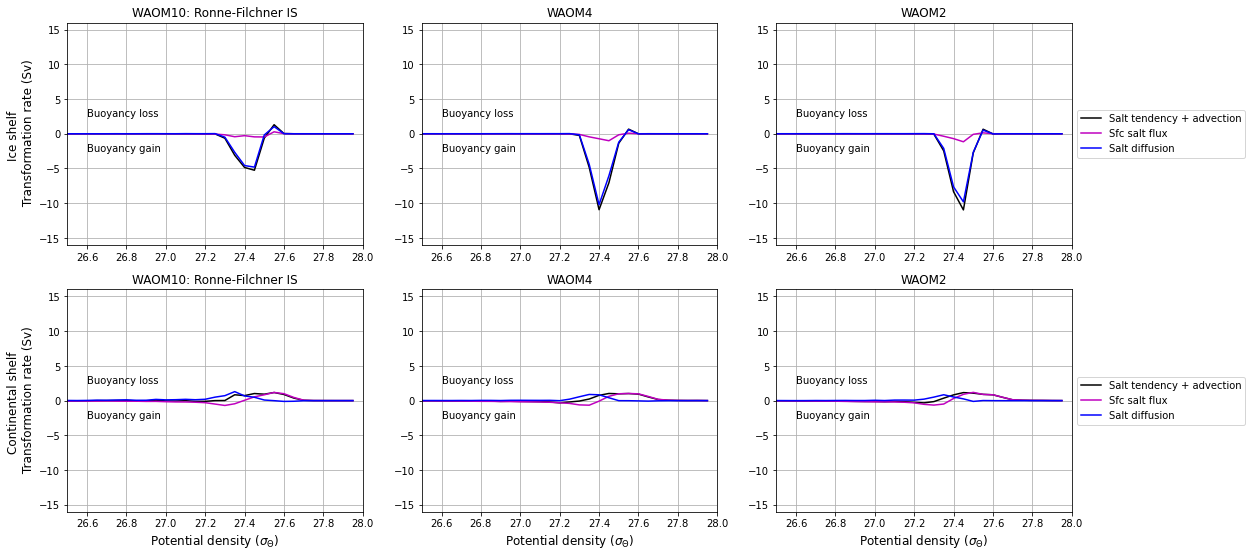

In [44]:
rho_grid = WAOM10_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(18,9))

# BUDGET
#cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Wed'],'--r',label='Ronne-Filchner IS')

ax4 = fig.add_subplot(231)
plt.title('WAOM10: Ronne-Filchner IS')
cn=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Wed']+WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Wed'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Wed'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed']+WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'-b',label='Salt diffusion')
plt.ylabel('Ice shelf \n Transformation rate (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax5 = fig.add_subplot(232)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Wed']+WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Wed'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Wed'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Wed']+WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Wed'],'-b',label='Salt diffusion')
# plt.xlabe ('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(233)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_iceshelf_salt_net_Wed['Fs_sig_net_vint_iceshelf_Wed']+WAOM2_iceshelf_salt_adv_Wed['Fs_sig_adv_vint_iceshelf_Wed'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_sfc_salt_Wed['Fs_sig_sfc_iceshelf_Wed'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_iceshelf_salt_adv_Wed['Fs_sig_adv_vint_iceshelf_Wed'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_Wed['Fs_sig_diff_vint_iceshelf_Wed']+WAOM2_iceshelf_sfc_salt_Wed['Fs_sig_sfc_iceshelf_Wed'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax4 = fig.add_subplot(234)
plt.title('WAOM10: Ronne-Filchner IS')
cn=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_Wed']+WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Wed'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Wed'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Wed'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed']+WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Wed'],'-b',label='Salt diffusion')
plt.ylabel('Continental shelf \n Transformation rate (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax5 = fig.add_subplot(235)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_Wed']+WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Wed'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Wed'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Wed'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Wed']+WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Wed'],'-b',label='Salt diffusion')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(236)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_net_Wed['Fs_sig_net_vint_shelf_noice_Wed']+WAOM2_shelf_noice_salt_adv_Wed['Fs_sig_adv_vint_shelf_noice_Wed'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_sfc_salt_Wed['Fs_sig_sfc_shelf_noice_Wed'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_adv_Wed['Fs_sig_adv_vint_shelf_noice_Wed'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_Wed['Fs_sig_diff_vint_shelf_noice_Wed']+WAOM2_shelf_noice_sfc_salt_Wed['Fs_sig_sfc_shelf_noice_Wed'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMT_Full_vint_yr20_decomposition_salt-budget_Wed.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

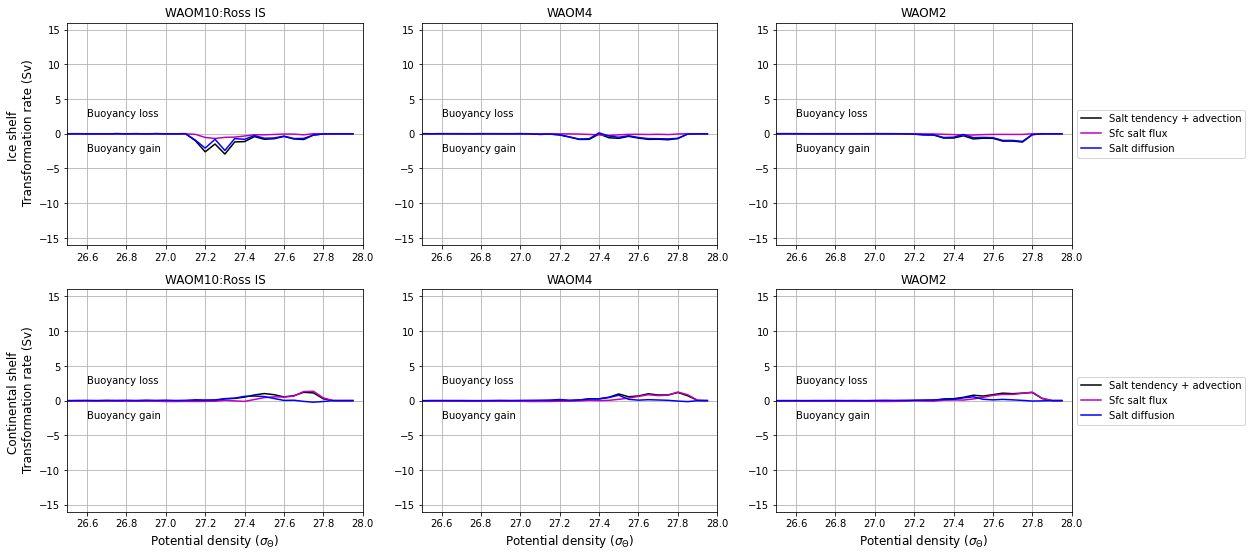

In [32]:
rho_grid = WAOM10_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(18,9))

# BUDGET
#cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Ros'],'--r',label='Ronne-Filchner IS')

ax4 = fig.add_subplot(231)
plt.title('WAOM10:Ross IS')
cn=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Ros']+WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Ros'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Ros'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Ros'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Ros']+WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Ros'],'-b',label='Salt diffusion')
plt.ylabel('Ice shelf \n Transformation rate (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax5 = fig.add_subplot(232)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Ros']+WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Ros'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Ros'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Ros'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Ros']+WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Ros'],'-b',label='Salt diffusion')
# plt.xlabe ('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(233)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_iceshelf_salt_net_Ros['Fs_sig_net_vint_iceshelf_Ros']+WAOM2_iceshelf_salt_adv_Ros['Fs_sig_adv_vint_iceshelf_Ros'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_sfc_salt_Ros['Fs_sig_sfc_iceshelf_Ros'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_iceshelf_salt_adv_Ros['Fs_sig_adv_vint_iceshelf_Ros'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_Ros['Fs_sig_diff_vint_iceshelf_Ros']+WAOM2_iceshelf_sfc_salt_Ros['Fs_sig_sfc_iceshelf_Ros'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax4 = fig.add_subplot(234)
plt.title('WAOM10:Ross IS')
cn=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_Ros']+WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Ros'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Ros'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Ros'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros']+WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Ros'],'-b',label='Salt diffusion')
plt.ylabel('Continental shelf \n Transformation rate (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax5 = fig.add_subplot(235)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_Ros']+WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Ros'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Ros'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Ros'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Ros']+WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Ros'],'-b',label='Salt diffusion')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(236)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_net_Ros['Fs_sig_net_vint_shelf_noice_Ros']+WAOM2_shelf_noice_salt_adv_Ros['Fs_sig_adv_vint_shelf_noice_Ros'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_sfc_salt_Ros['Fs_sig_sfc_shelf_noice_Ros'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_adv_Ros['Fs_sig_adv_vint_shelf_noice_Ros'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_Ros['Fs_sig_diff_vint_shelf_noice_Ros']+WAOM2_shelf_noice_sfc_salt_Ros['Fs_sig_sfc_shelf_noice_Ros'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMT_Full_vint_yr20_decomposition_salt-budget_Ros.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

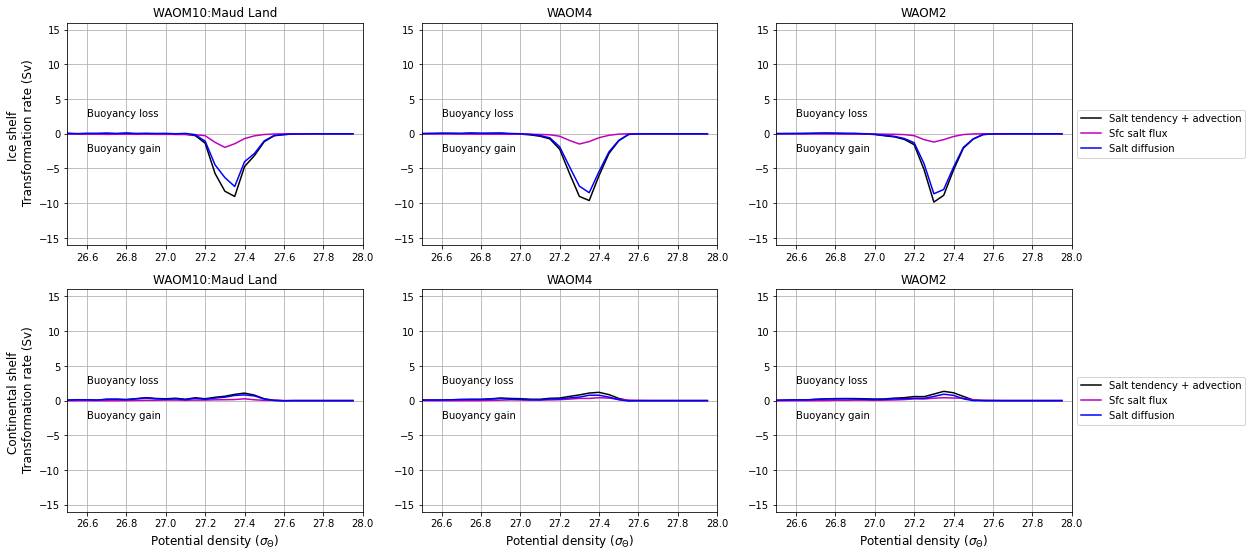

In [33]:
rho_grid = WAOM10_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(18,9))

# BUDGET
#cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Mau'],'--r',label='Ronne-Filchner IS')

ax4 = fig.add_subplot(231)
plt.title('WAOM10:Maud Land')
cn=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Mau']+WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Mau'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Mau'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Mau'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Mau']+WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Mau'],'-b',label='Salt diffusion')
plt.ylabel('Ice shelf \n Transformation rate (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax5 = fig.add_subplot(232)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_Mau']+WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Mau'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Mau'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_Mau'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_Mau']+WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_Mau'],'-b',label='Salt diffusion')
# plt.xlabe ('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(233)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_iceshelf_salt_net_Mau['Fs_sig_net_vint_iceshelf_Mau']+WAOM2_iceshelf_salt_adv_Mau['Fs_sig_adv_vint_iceshelf_Mau'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_sfc_salt_Mau['Fs_sig_sfc_iceshelf_Mau'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_iceshelf_salt_adv_Mau['Fs_sig_adv_vint_iceshelf_Mau'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_Mau['Fs_sig_diff_vint_iceshelf_Mau']+WAOM2_iceshelf_sfc_salt_Mau['Fs_sig_sfc_iceshelf_Mau'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax4 = fig.add_subplot(234)
plt.title('WAOM10:Maud Land')
cn=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_Mau']+WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Mau'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Mau'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Mau'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau']+WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Mau'],'-b',label='Salt diffusion')
plt.ylabel('Continental shelf \n Transformation rate (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax5 = fig.add_subplot(235)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_Mau']+WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Mau'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Mau'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_Mau'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_Mau']+WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_Mau'],'-b',label='Salt diffusion')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(236)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_net_Mau['Fs_sig_net_vint_shelf_noice_Mau']+WAOM2_shelf_noice_salt_adv_Mau['Fs_sig_adv_vint_shelf_noice_Mau'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_sfc_salt_Mau['Fs_sig_sfc_shelf_noice_Mau'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_adv_Mau['Fs_sig_adv_vint_shelf_noice_Mau'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_Mau['Fs_sig_diff_vint_shelf_noice_Mau']+WAOM2_shelf_noice_sfc_salt_Mau['Fs_sig_sfc_shelf_noice_Mau'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMT_Full_vint_yr20_decomposition_salt-budget_Mau.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

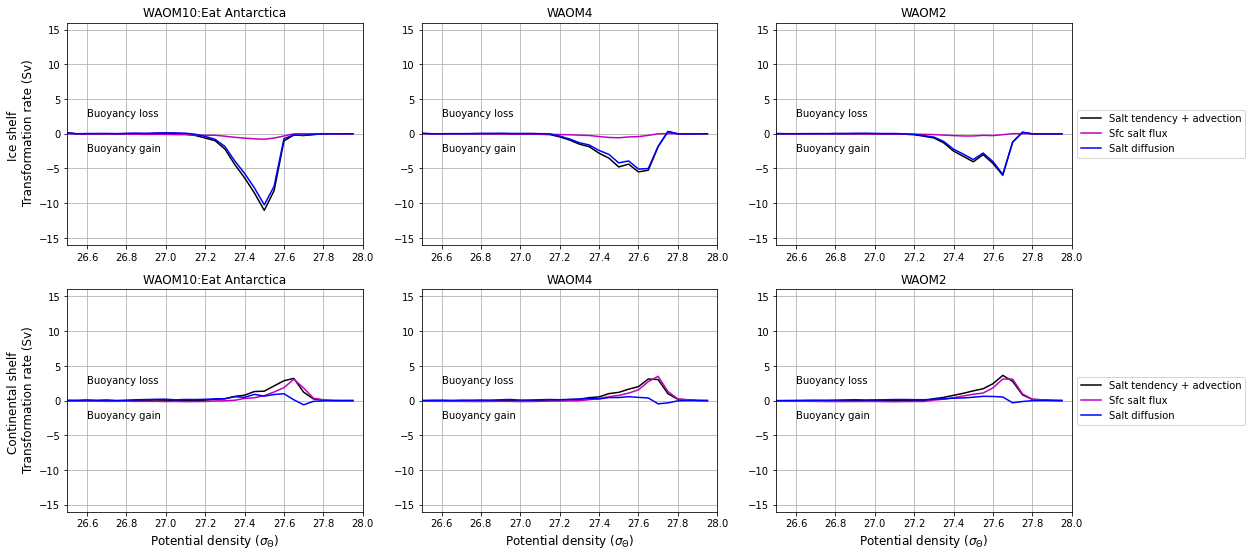

In [34]:
rho_grid = WAOM10_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(18,9))

# BUDGET
#cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_EAnt'],'--r',label='Ronne-Filchner IS')

ax4 = fig.add_subplot(231)
plt.title('WAOM10:Eat Antarctica')
cn=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_EAnt']+WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_EAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_EAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt']+WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'-b',label='Salt diffusion')
plt.ylabel('Ice shelf \n Transformation rate (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax5 = fig.add_subplot(232)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_EAnt']+WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_EAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_EAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_EAnt']+WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_EAnt'],'-b',label='Salt diffusion')
# plt.xlabe ('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(233)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_iceshelf_salt_net_EAnt['Fs_sig_net_vint_iceshelf_EAnt']+WAOM2_iceshelf_salt_adv_EAnt['Fs_sig_adv_vint_iceshelf_EAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_sfc_salt_EAnt['Fs_sig_sfc_iceshelf_EAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_iceshelf_salt_adv_EAnt['Fs_sig_adv_vint_iceshelf_EAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_EAnt['Fs_sig_diff_vint_iceshelf_EAnt']+WAOM2_iceshelf_sfc_salt_EAnt['Fs_sig_sfc_iceshelf_EAnt'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax4 = fig.add_subplot(234)
plt.title('WAOM10:Eat Antarctica')
cn=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_EAnt']+WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_EAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_EAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_EAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt']+WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_EAnt'],'-b',label='Salt diffusion')
plt.ylabel('Continental shelf \n Transformation rate (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax5 = fig.add_subplot(235)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_EAnt']+WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_EAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_EAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_EAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_EAnt']+WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_EAnt'],'-b',label='Salt diffusion')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(236)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_net_EAnt['Fs_sig_net_vint_shelf_noice_EAnt']+WAOM2_shelf_noice_salt_adv_EAnt['Fs_sig_adv_vint_shelf_noice_EAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_sfc_salt_EAnt['Fs_sig_sfc_shelf_noice_EAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_adv_EAnt['Fs_sig_adv_vint_shelf_noice_EAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_EAnt['Fs_sig_diff_vint_shelf_noice_EAnt']+WAOM2_shelf_noice_sfc_salt_EAnt['Fs_sig_sfc_shelf_noice_EAnt'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMT_Full_vint_yr20_decomposition_salt-budget_EAnt.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

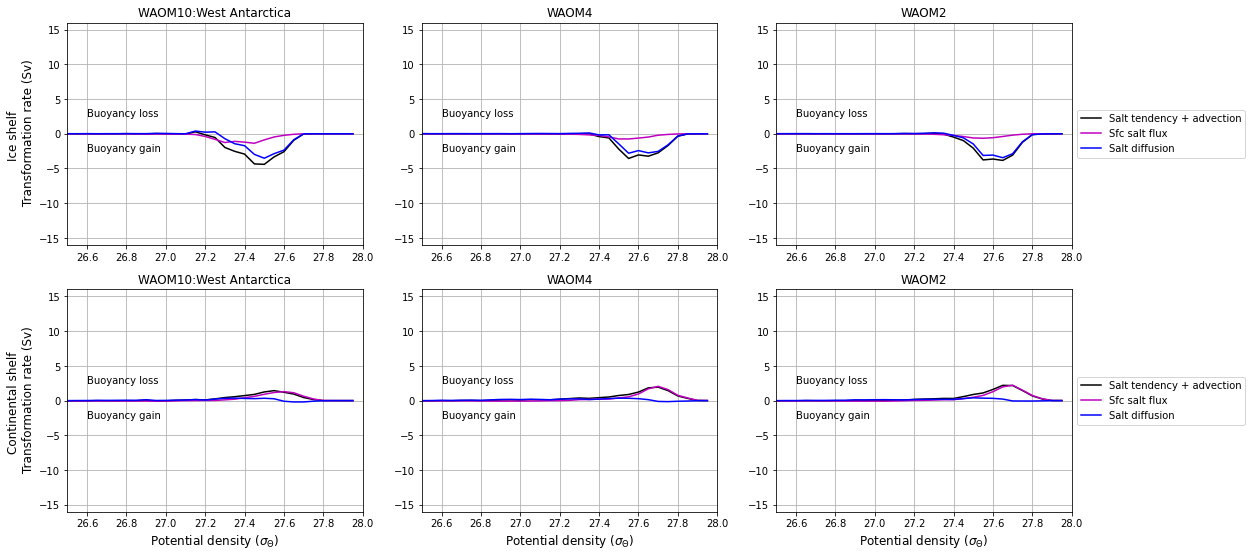

In [35]:
rho_grid = WAOM10_shelf_heat_net['rho_grid']

fig = plt.figure(figsize=(18,9))

# BUDGET
#cs=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_WAnt'],'--r',label='Ronne-Filchner IS')

ax4 = fig.add_subplot(231)
plt.title('WAOM10:West Antarctica')
cn=plt.plot(rho_grid,-WAOM10_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_WAnt']+WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_WAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_WAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt']+WAOM10_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'-b',label='Salt diffusion')
plt.ylabel('Ice shelf \n Transformation rate (Sv)',fontsize=12)
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax5 = fig.add_subplot(232)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_iceshelf_salt_net_subregions['Fs_sig_net_vint_iceshelf_WAnt']+WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_WAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_iceshelf_salt_adv_subregions['Fs_sig_adv_vint_iceshelf_WAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_iceshelf_salt_diff_subregions['Fs_sig_diff_vint_iceshelf_WAnt']+WAOM4_iceshelf_sfc_salt_subregions['Fs_sig_sfc_iceshelf_WAnt'],'-b',label='Salt diffusion')
# plt.xlabe ('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(233)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_iceshelf_salt_net_WAnt['Fs_sig_net_vint_iceshelf_WAnt']+WAOM2_iceshelf_salt_adv_WAnt['Fs_sig_adv_vint_iceshelf_WAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_iceshelf_sfc_salt_WAnt['Fs_sig_sfc_iceshelf_WAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_iceshelf_salt_adv_WAnt['Fs_sig_adv_vint_iceshelf_WAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_iceshelf_salt_diff_WAnt['Fs_sig_diff_vint_iceshelf_WAnt']+WAOM2_iceshelf_sfc_salt_WAnt['Fs_sig_sfc_iceshelf_WAnt'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel('Potential density ($\sigma_{\Theta}$)')
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

ax4 = fig.add_subplot(234)
plt.title('WAOM10:West Antarctica')
cn=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_WAnt']+WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_WAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_WAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_WAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM10_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt']+WAOM10_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_WAnt'],'-b',label='Salt diffusion')
plt.ylabel('Continental shelf \n Transformation rate (Sv)',fontsize=12)
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax5 = fig.add_subplot(235)
plt.title('WAOM4')
cn=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_net_subregions['Fs_sig_net_vint_shelf_noice_WAnt']+WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_WAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_WAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_adv_subregions['Fs_sig_adv_vint_shelf_noice_WAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM4_shelf_noice_salt_diff_subregions['Fs_sig_diff_vint_shelf_noice_WAnt']+WAOM4_shelf_noice_sfc_salt_subregions['Fs_sig_sfc_shelf_noice_WAnt'],'-b',label='Salt diffusion')
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')
#
ax6 = fig.add_subplot(236)
plt.title('WAOM2')
cn=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_net_WAnt['Fs_sig_net_vint_shelf_noice_WAnt']+WAOM2_shelf_noice_salt_adv_WAnt['Fs_sig_adv_vint_shelf_noice_WAnt'],'k',label='Salt tendency + advection')
cs=plt.plot(rho_grid,-WAOM2_shelf_noice_sfc_salt_WAnt['Fs_sig_sfc_shelf_noice_WAnt'],'-m',label='Sfc salt flux')
# ca=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_adv_WAnt['Fs_sig_adv_vint_shelf_noice_WAnt'],'-r',label='Salt advection')
cd=plt.plot(rho_grid,-WAOM2_shelf_noice_salt_diff_WAnt['Fs_sig_diff_vint_shelf_noice_WAnt']+WAOM2_shelf_noice_sfc_salt_WAnt['Fs_sig_sfc_shelf_noice_WAnt'],'-b',label='Salt diffusion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Potential density ($\sigma_{\Theta}$)',fontsize=12)
plt.xlim(26.5,28),plt.ylim(-16,16)
plt.grid(True)
plt.text(26.6,2.5,'Buoyancy loss')
plt.text(26.6,-2.5,'Buoyancy gain')

name_fig="waom10x4x2extend_shflim_S_0.25Q_WMT_Full_vint_yr20_decomposition_salt-budget_WAnt.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

In [36]:
rho_grid=np.arange(26.,28.,0.05)

print(rho_grid[26],rho_grid[37])

print(rho_grid[26:34])

27.30000000000002 27.850000000000026
[27.3  27.35 27.4  27.45 27.5  27.55 27.6  27.65]
